<div style="background-color: white; color: black; font-family: 'Courier New', monospace; padding: 30px; border-radius: 15px; border: 3px solid #a2f1d8; box-shadow: 0 0 20px #a2f1d8;">
<div>
    <h1 style="text-align: center;">Introduction</h1>
    <h3>In this project, we will conduct a comprehensive exploratory data analysis followed by clustering using the K-means algorithm. The primary goal of this project is to gain insights into customers' behaviors, demographics, and to identify patterns and similarities among different customer segments.</h3>
    <h3>By understanding the distinct characteristics of each customer group, businesses can tailor their marketing strategies to meet the specific needs and preferences of each segment, ultimately enhancing customer satisfaction and driving business growth. This analysis will provide valuable insights that can help the company make informed decisions and optimize its marketing efforts.</h3>
    </div>
</div>


<div style="background-color: white; color: black; font-family: 'Courier New', monospace; padding: 30px; border-radius: 15px; border: 3px solid #a2f1d8; box-shadow: 0 0 20px #a2f1d8;">
    <h1>Note:</h1>
    <h4>I have placed a greater emphasis on the analysis aspect, which appears to have received less attention from other Kagglers who have undertaken the same project.</h4>
    <h4>This approach has allowed us to gain insights into the data and even identfy the potential clusters and different groups of customers, before applying any machine learning techniques.</h4>
    <h4>This is one of my earliest data science projects, so it's definitely not perfect, so any comments and suggestions would be useful.</h4>
</div>


# Importing libararies and loading the dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#show all the column of the df
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv',sep="\t")


# Initial Data cleaning and feature engineering

## Dataset Description

The dataset contains the following attributes:

### People

- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

### Promotion

- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# #df['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'].iloc[0]
# #create a new column with name from the column names that are separated by \t
# columns = df.columns[0].split('\t')
# #loop through the columns string names
# column_number = 0
# for column in columns:
#     #create a new column with the current name of the string
#     row_values = []
#     for i in range(len(df)):
#         row_values.append(df['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'].iloc[i].split('\t')[column_number])
#     column_number += 1
#     df[column] = row_values
#     #fill the new column with the values from the main column that are separated by \t but with the value that belong to it
# #drop the main column
# df.drop(columns=['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'], inplace=True)

In [5]:
#check for null values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
#drop Z_CostContact and Z_Revenue invalueble columns
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)


In [8]:
df['Income'] = df['Income'].replace('', np.nan)  # replace empty strings with NaN
df['Income'] = df['Income'].fillna(0)  # fill NaN values with 0

In [9]:
# List of columns to convert to 'int64'
int_cols = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 
            'Response','Income']

# Convert columns to 'int64'
for col in int_cols:
    df[col] = df[col].astype('int64')

# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# List of columns to convert to 'string'
str_cols = ['Education', 'Marital_Status']

# Convert columns to 'string'
for col in str_cols:
    df[col] = df[col].astype('string')

In [10]:
#drop id column
df.drop(columns=['ID'], inplace=True)
#drop complain column
df['Complain'].value_counts()
df.drop(columns=['Complain'], inplace=True)
#drop recency column
df.drop(columns=['Recency'], inplace=True)


* The Id column won't add any value to the analysis or the clustring  
* Very few customers have complained,This is a class imbalance problem  
* most customers are active in the past 2 years so recency has less importance

In [11]:
#Creating Age feature:

latest_date = df['Dt_Customer'].max()
df['Age'] = latest_date.year - df['Year_Birth']

#drop the Year_Birth column
df.drop(columns=['Year_Birth'], inplace=True)
df.drop(columns=['Dt_Customer'], inplace=True)

In [12]:
#feature with the total spending of the customer
df['Total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [13]:
#featue with the total number of childeren in the household
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [14]:
#feature with the total number of purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [15]:
#feature with the total number of accepted campaigns
df['Total_Accepted_Campaigns'] = (df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']+ df['Response'])

In [16]:
# organize the columns
# Define the new order of the columns
column_order = [ 'Age', 'Education', 'Marital_Status', 'Income', 
                'Kidhome', 'Teenhome', 'Total_Children', 
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                'MntSweetProducts', 'MntGoldProds', 'Total_spending', 
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                'NumStorePurchases', 'Total_Purchases', 'NumWebVisitsMonth', 
                'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                'AcceptedCmp5', 'Response', 'Total_Accepted_Campaigns']

# Reorder the columns
df = df[column_order]

In [17]:
#renaming the columns to make them more readable
df.rename(columns={
    'Kidhome': 'NumberOfKidsAtHome',
    'Teenhome': 'NumberOfTeensAtHome',
    'Total_Children': 'TotalNumberOfChildren',
    'Days_Since_Joined': 'DaysSinceEnrollment',
    'MntWines': 'AmountSpentOnWines',
    'MntFruits': 'AmountSpentOnFruits',
    'MntMeatProducts': 'AmountSpentOnMeat',
    'MntFishProducts': 'AmountSpentOnFish',
    'MntSweetProducts': 'AmountSpentOnSweets',
    'MntGoldProds': 'AmountSpentOnGold',
    'Total_spending': 'TotalSpending',
    'NumDealsPurchases': 'NumberOfDealsPurchases',
    'NumWebPurchases': 'NumberOfWebPurchases',
    'NumCatalogPurchases': 'NumberOfCatalogPurchases',
    'NumStorePurchases': 'NumberOfStorePurchases',
    'Total_Purchases': 'TotalNumberOfPurchases',
    'NumWebVisitsMonth': 'NumberOfWebVisitsPerMonth',
    'AcceptedCmp1': 'AcceptedCampaign1',
    'AcceptedCmp2': 'AcceptedCampaign2',
    'AcceptedCmp3': 'AcceptedCampaign3',
    'AcceptedCmp4': 'AcceptedCampaign4',
    'AcceptedCmp5': 'AcceptedCampaign5',
    'Response': 'AcceptedLastCampaign',
    'Total_Accepted_Campaigns': 'TotalAcceptedCampaigns',
}, inplace=True)

# Univariant Analysis

In [18]:
#descriptive statistics for age 
df['Age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

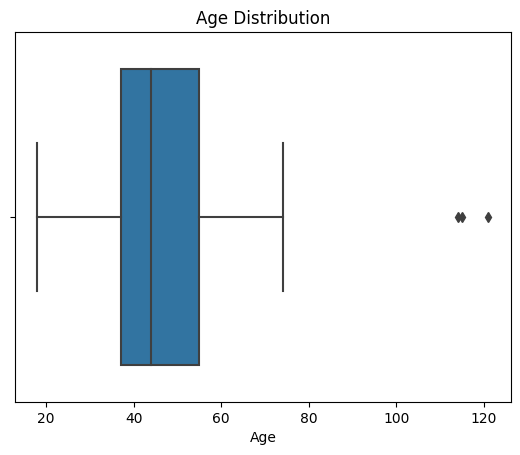

In [19]:
sns.boxplot(x='Age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

<Axes: xlabel='Age'>

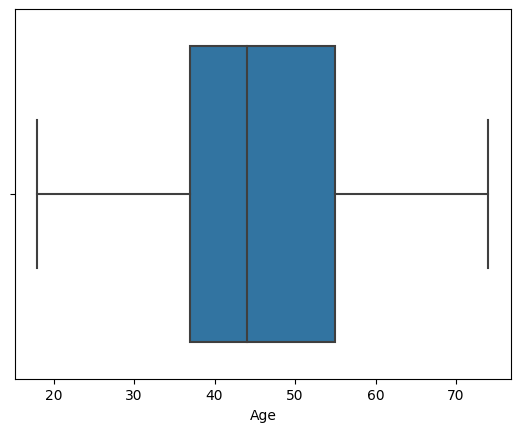

In [20]:
# Keep only the rows where 'Age' is less than or equal to 80
df = df[df['Age'] <= 80]

sns.boxplot(x=df['Age'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


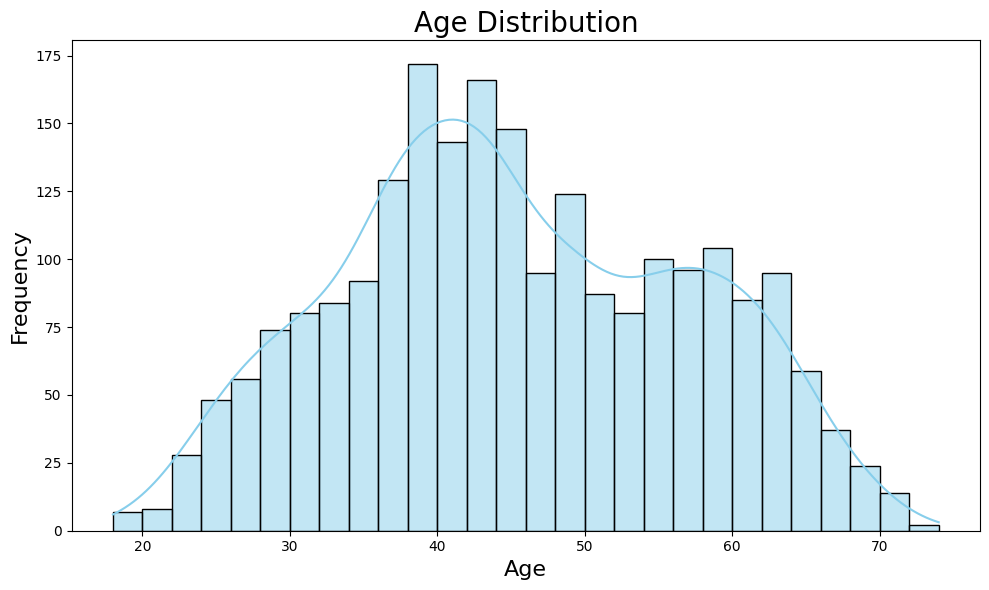

In [21]:
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(df['Age'], bins=30, kde=True, color="skyblue",binwidth=2)
hist_plot.set_title('Age Distribution', fontsize=20)
hist_plot.set_xlabel('Age', fontsize=16)
hist_plot.set_ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


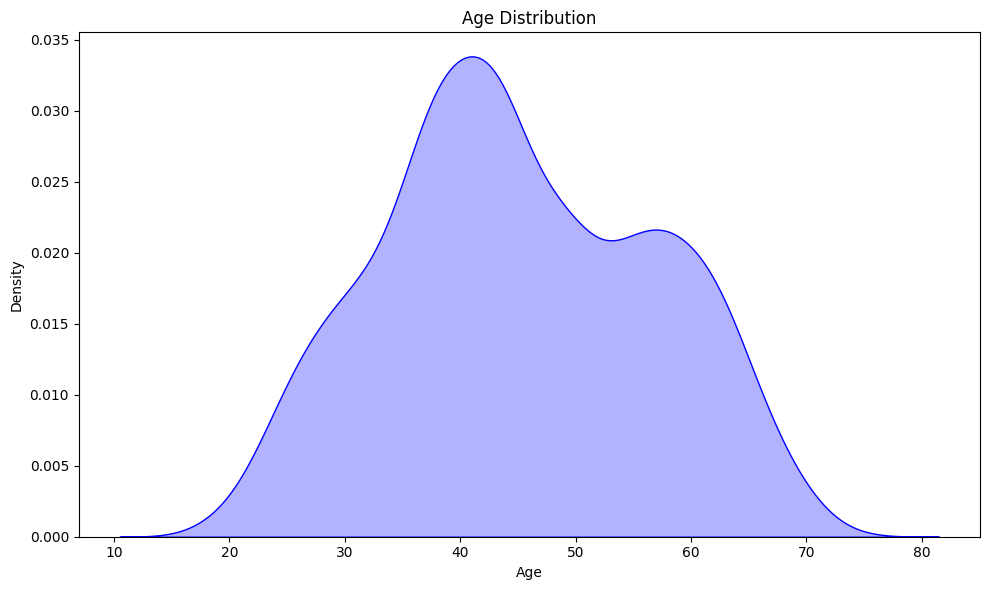

In [22]:
#density plots for age
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'], fill=True, color='blue', alpha=0.3)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

* Outliers detected and removed  
* The distribution is higher between 35 and 50 years old  
* The distribution is slightly right skewed  

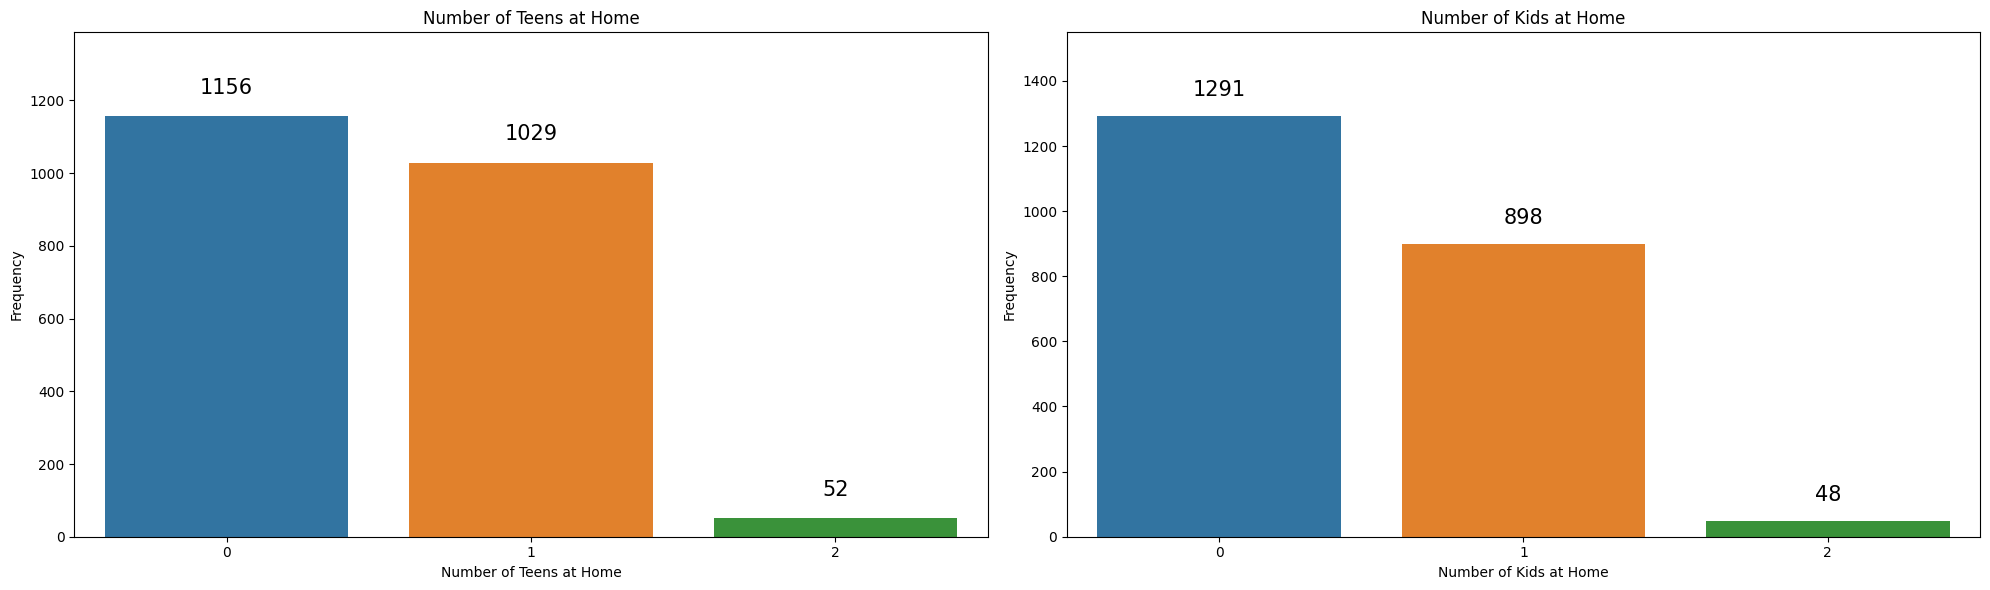

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))  

# Plot for number of teens at home
sns.countplot(x='NumberOfTeensAtHome', data=df, ax=axes[0])
for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height() + 50, '%d' % int(p.get_height()),
                 ha='center', va='bottom', fontsize=15, color='black')
axes[0].set_title('Number of Teens at Home')
axes[0].set_xlabel('Number of Teens at Home')
axes[0].set_ylabel('Frequency')
# Adjust the upper padding to make room for the text
max_height = max([p.get_height() for p in axes[0].patches])
axes[0].set_ylim(0, max_height * 1.2)

# Plot for number of kids at home
sns.countplot(x='NumberOfKidsAtHome', data=df, ax=axes[1])
for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height() + 50, '%d' % int(p.get_height()),
                 ha='center', va='bottom', fontsize=15, color='black')
axes[1].set_title('Number of Kids at Home')
axes[1].set_xlabel('Number of Kids at Home')
axes[1].set_ylabel('Frequency')
# Adjust the upper padding to make room for the text
max_height = max([p.get_height() for p in axes[1].patches])
axes[1].set_ylim(0, max_height * 1.2)

plt.tight_layout()
plt.show()


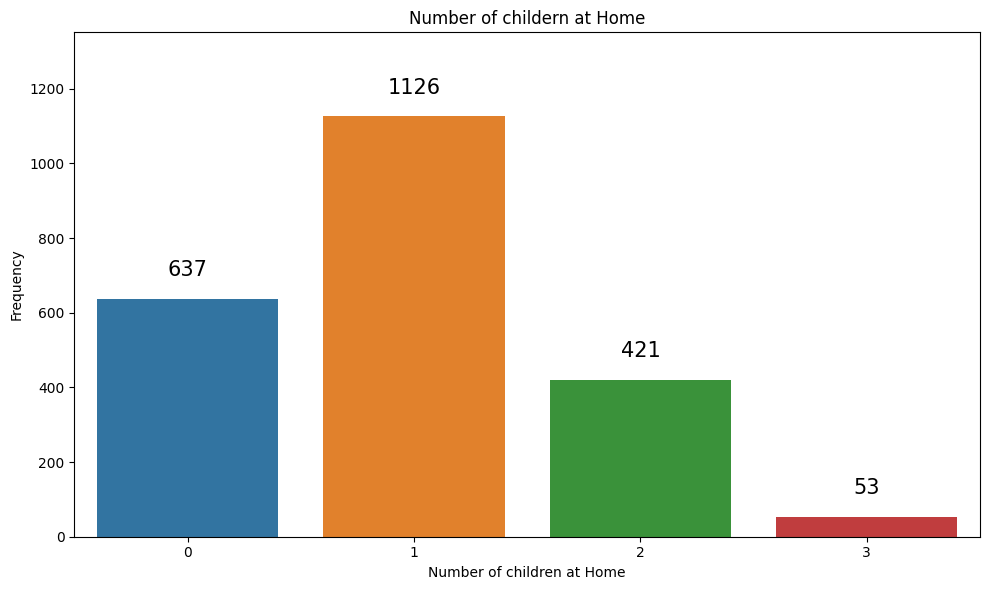

In [24]:
plt.figure(figsize=(10, 6))    
sns.countplot(x='TotalNumberOfChildren', data=df)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height()+50, '%d' % int(p.get_height()), 
             ha='center', va='bottom', fontsize=15, color='black')

plt.title('Number of childern at Home')
plt.xlabel('Number of children at Home')
plt.ylabel('Frequency')
plt.tight_layout()

#adjust upper padding to make room for the text
max_height = max([p.get_height() for p in plt.gca().patches])
plt.ylim(0, max_height * 1.2)
plt.show()

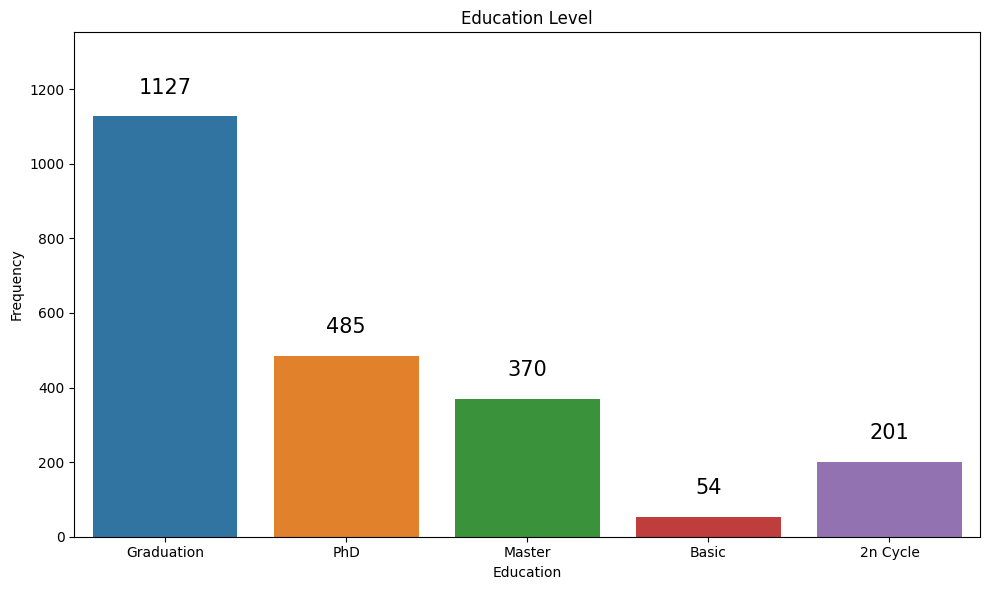

In [25]:
plt.figure(figsize=(10, 6))    
sns.countplot(x='Education', data=df)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height()+50, '%d' % int(p.get_height()), 
             ha='center', va='bottom', fontsize=15, color='black')

plt.title('Education Level')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.tight_layout()

#adjust upper padding to make room for the text
max_height = max([p.get_height() for p in plt.gca().patches])
plt.ylim(0, max_height * 1.2)
plt.show()


* Most of the customers have higher education
* **for us to group the education level into less categories requires farther analysis later in the multivariate analysis phase**

In [26]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: Int64

In [27]:
#grouping the martials status into less categories one called in relationship and the othe single
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'In relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone','Single','Absurd','YOLO'], 'Single')

In [28]:
df['Income'].describe()

count      2237.000000
mean      51676.153330
std       25615.057625
min           0.000000
25%       34704.000000
50%       51039.000000
75%       68281.000000
max      666666.000000
Name: Income, dtype: float64

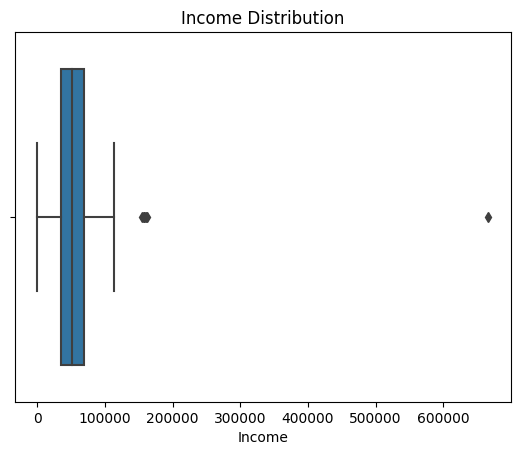

In [29]:
sns.boxplot(x='Income', data=df)
plt.title('Income Distribution')
plt.xlabel('Income')   
plt.show()

In [30]:
def remove_outliers(df, col, multiplier=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [31]:
df = remove_outliers(df, 'Income')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


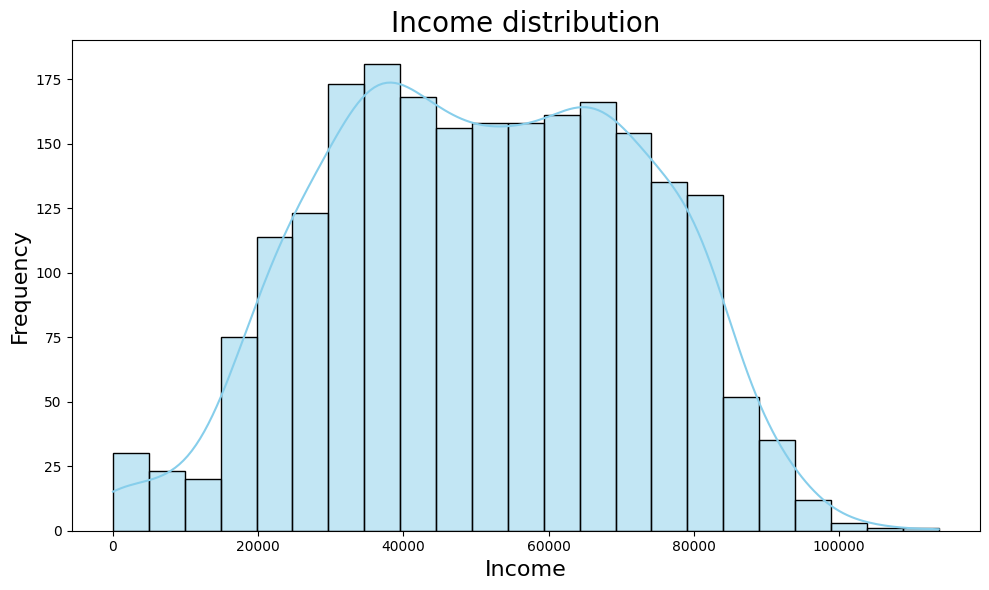

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, color="skyblue")
plt.title('Income distribution', fontsize=20)
plt.xlabel('Income', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

there is no clear pattern in the income distribution

In [33]:
spending_cols = ['AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 
                 'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold']
df[spending_cols].describe()

,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055
std,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


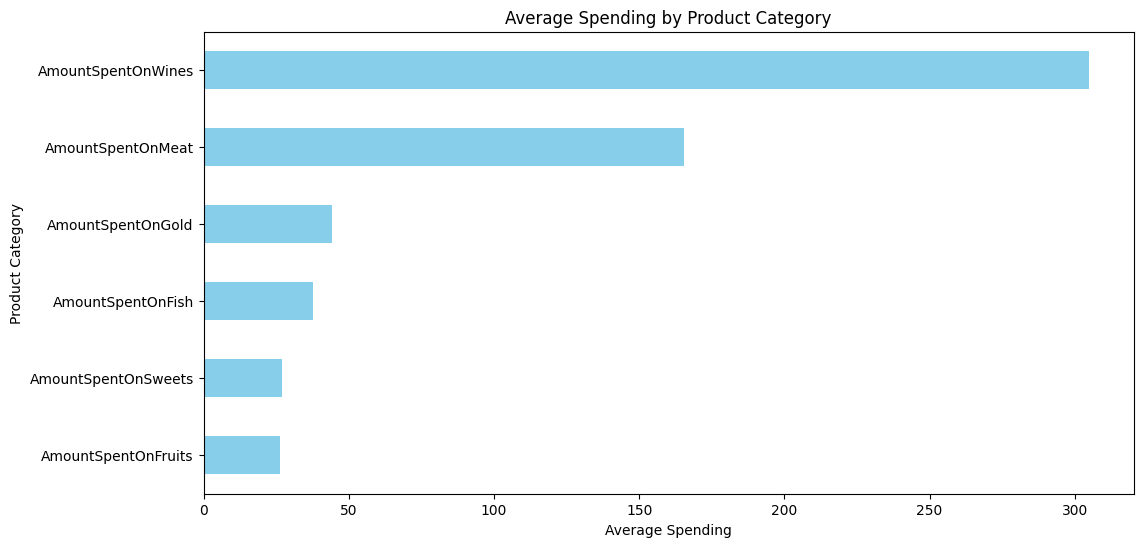

In [34]:
# Calculating total and average spending in each product category
average_spending_by_category = df[spending_cols].mean()


# Visualizing total spending in each product category
plt.figure(figsize=(12, 6))
average_spending_by_category.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Spending by Product Category')
plt.xlabel('Average Spending')
plt.ylabel('Product Category')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

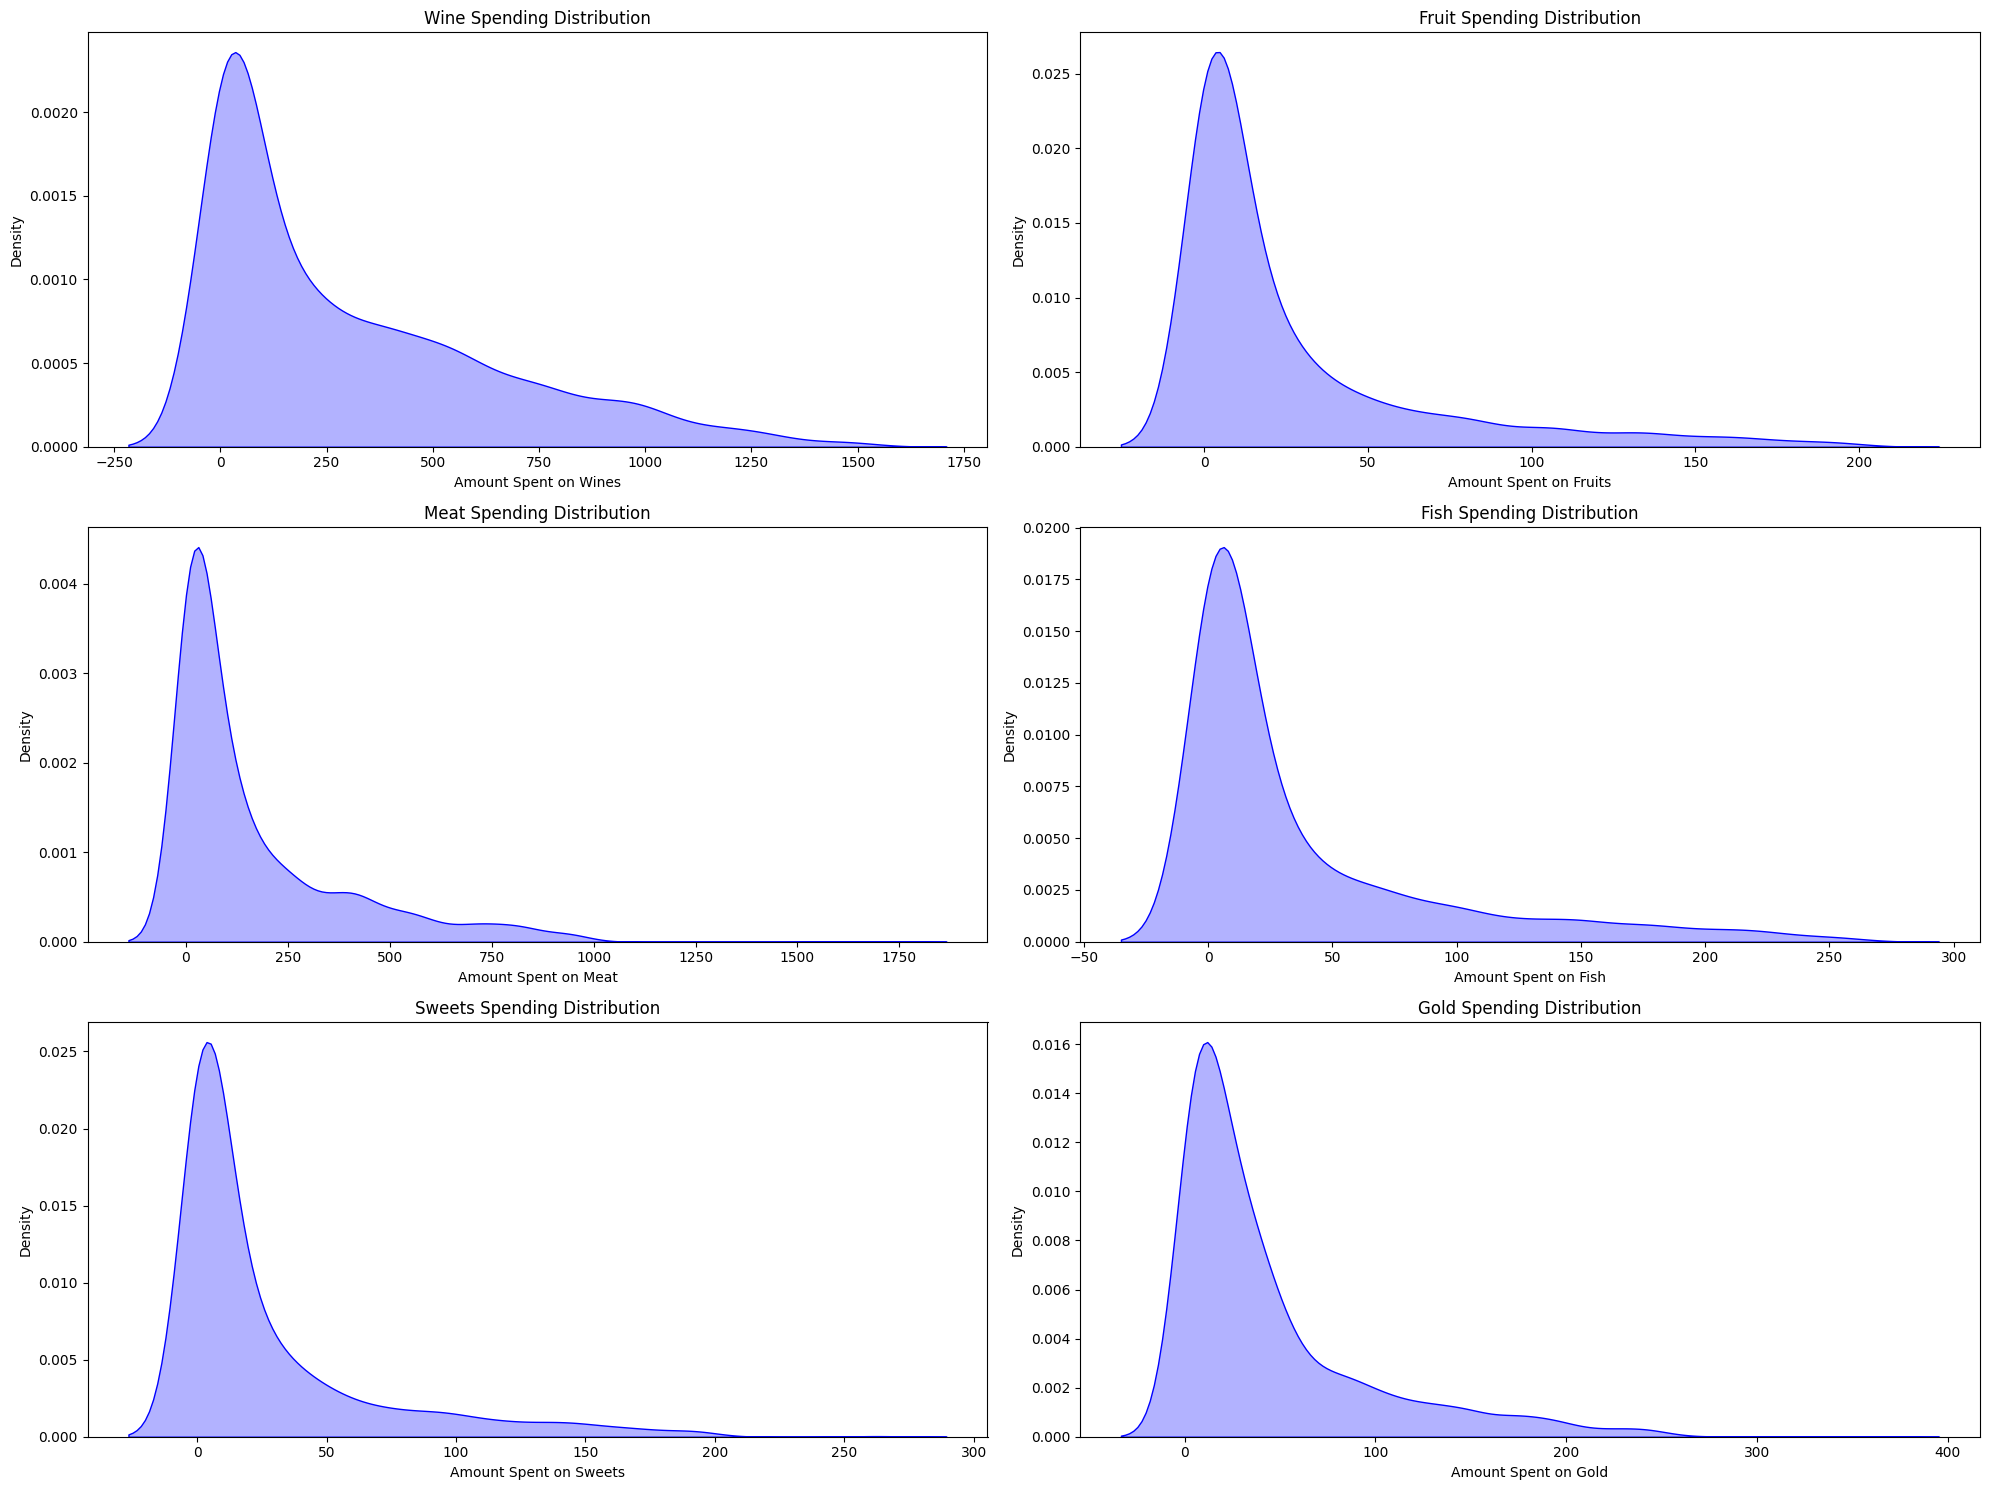

In [35]:
#density plot for all spending catogeries each catogery plotted on a graph but shown togethre 2 each row 

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # 3 rows, 2 columns

# Plot for amount spent on wines

sns.kdeplot(df['AmountSpentOnWines'], fill=True, color='blue', alpha=0.3, ax=axes[0, 0])
axes[0, 0].set_title('Wine Spending Distribution')
axes[0, 0].set_xlabel('Amount Spent on Wines')
axes[0, 0].set_ylabel('Density')

# Plot for amount spent on fruits
sns.kdeplot(df['AmountSpentOnFruits'], fill=True, color='blue', alpha=0.3, ax=axes[0, 1])
axes[0, 1].set_title('Fruit Spending Distribution')
axes[0, 1].set_xlabel('Amount Spent on Fruits')
axes[0, 1].set_ylabel('Density')

# Plot for amount spent on meat
sns.kdeplot(df['AmountSpentOnMeat'], fill=True, color='blue', alpha=0.3, ax=axes[1, 0])
axes[1, 0].set_title('Meat Spending Distribution')
axes[1, 0].set_xlabel('Amount Spent on Meat')
axes[1, 0].set_ylabel('Density')

# Plot for amount spent on fish

sns.kdeplot(df['AmountSpentOnFish'], fill=True, color='blue', alpha=0.3, ax=axes[1, 1])
axes[1, 1].set_title('Fish Spending Distribution')
axes[1, 1].set_xlabel('Amount Spent on Fish')
axes[1, 1].set_ylabel('Density')

# Plot for amount spent on sweets
sns.kdeplot(df['AmountSpentOnSweets'], fill=True, color='blue', alpha=0.3, ax=axes[2, 0])
axes[2, 0].set_title('Sweets Spending Distribution')
axes[2, 0].set_xlabel('Amount Spent on Sweets')
axes[2, 0].set_ylabel('Density')

# Plot for amount spent on gold
sns.kdeplot(df['AmountSpentOnGold'], fill=True, color='blue', alpha=0.3, ax=axes[2, 1])
axes[2, 1].set_title('Gold Spending Distribution')
axes[2, 1].set_xlabel('Amount Spent on Gold')
axes[2, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()



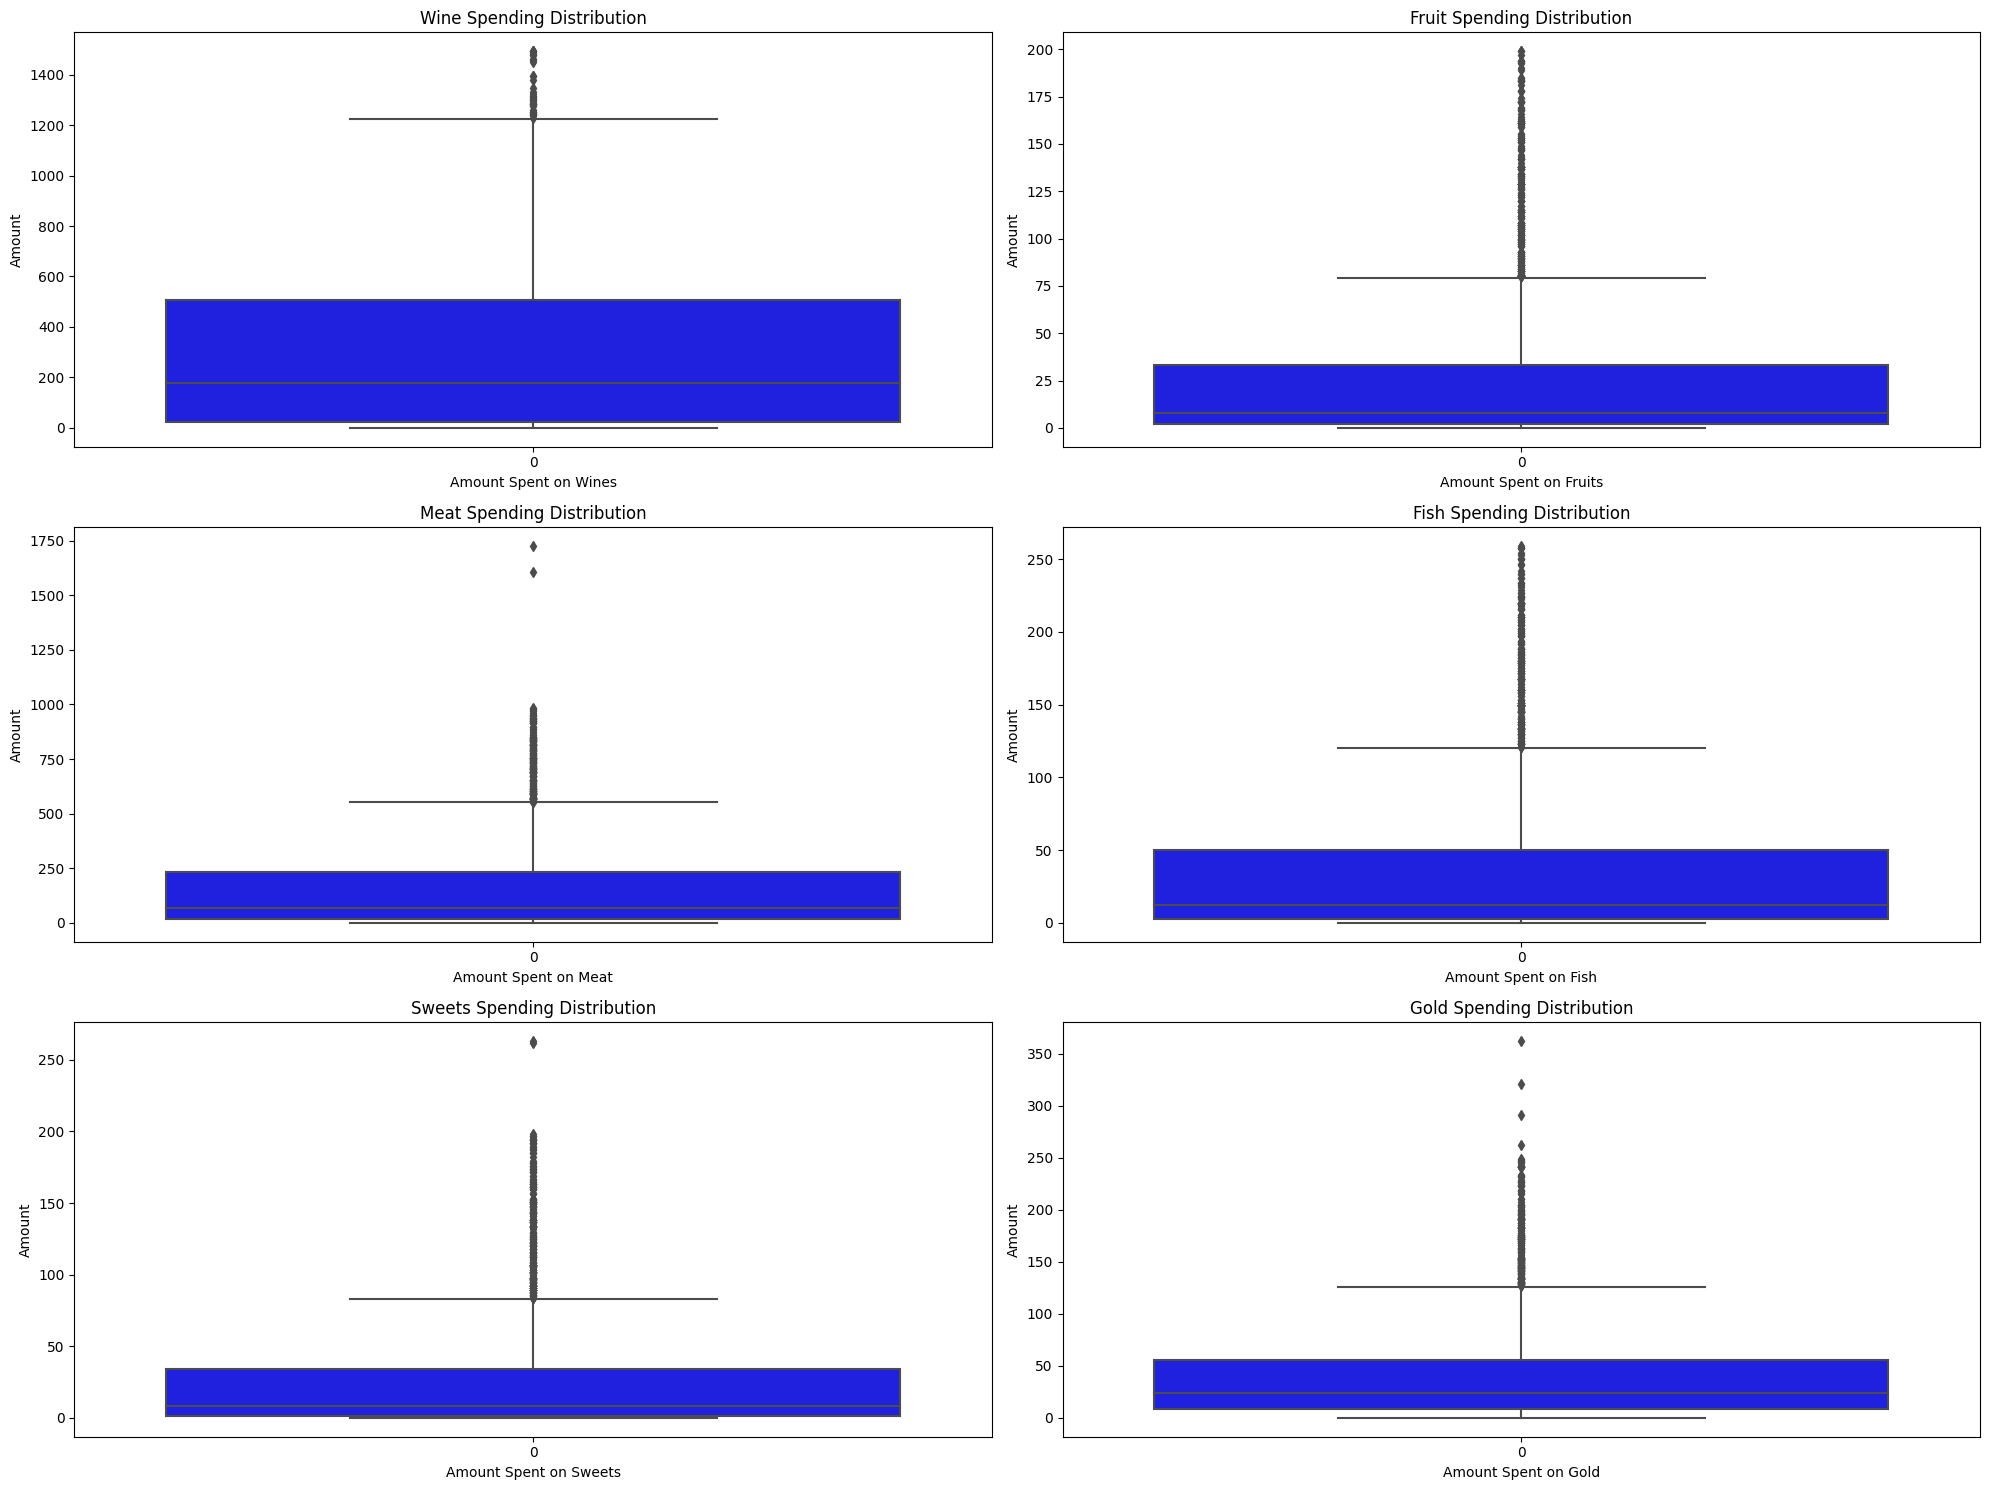

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # 3 rows, 2 columns

# Box plot for amount spent on wines
sns.boxplot(df['AmountSpentOnWines'], color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Wine Spending Distribution')
axes[0, 0].set_xlabel('Amount Spent on Wines')
axes[0, 0].set_ylabel('Amount')

# Box plot for amount spent on fruits
sns.boxplot(df['AmountSpentOnFruits'], color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Fruit Spending Distribution')
axes[0, 1].set_xlabel('Amount Spent on Fruits')
axes[0, 1].set_ylabel('Amount')

# Box plot for amount spent on meat
sns.boxplot(df['AmountSpentOnMeat'], color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Meat Spending Distribution')
axes[1, 0].set_xlabel('Amount Spent on Meat')
axes[1, 0].set_ylabel('Amount')

# Box plot for amount spent on fish
sns.boxplot(df['AmountSpentOnFish'], color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Fish Spending Distribution')
axes[1, 1].set_xlabel('Amount Spent on Fish')
axes[1, 1].set_ylabel('Amount')

# Box plot for amount spent on sweets
sns.boxplot(df['AmountSpentOnSweets'], color='blue', ax=axes[2, 0])
axes[2, 0].set_title('Sweets Spending Distribution')
axes[2, 0].set_xlabel('Amount Spent on Sweets')
axes[2, 0].set_ylabel('Amount')

# Box plot for amount spent on gold
sns.boxplot(df['AmountSpentOnGold'], color='blue', ax=axes[2, 1])
axes[2, 1].set_title('Gold Spending Distribution')
axes[2, 1].set_xlabel('Amount Spent on Gold')
axes[2, 1].set_ylabel('Amount')

plt.tight_layout()
plt.show()

In [37]:
df=remove_outliers(df, 'AmountSpentOnMeat', multiplier=3)
df=remove_outliers(df, 'AmountSpentOnSweets', multiplier=3)

* **The dataset shows varied spending across categories with some outliers. We kept most outliers to maintain data integrity, removing only the most extreme cases in meat and sweets to improve clustering results.**
* **Meat and Wine are the have considerbly high numbers compared to other categories**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


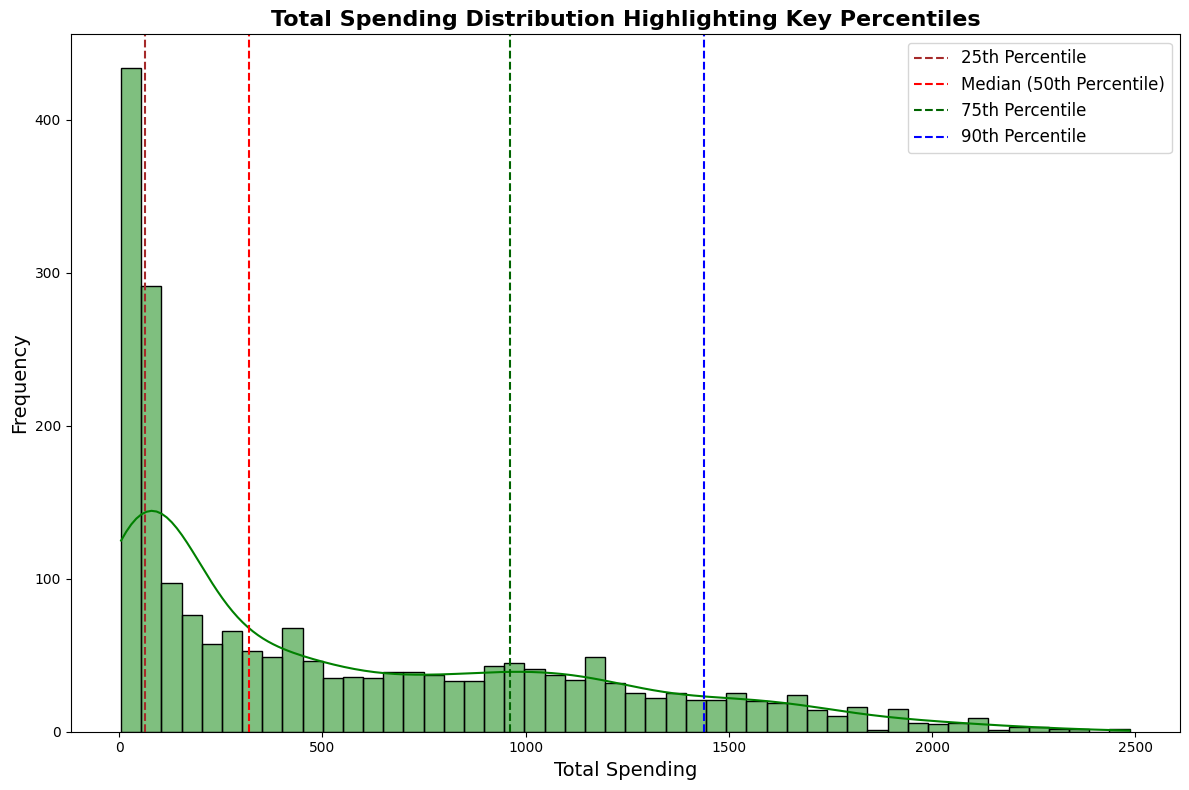

      TotalSpending
0.25           65.0
0.50          319.5
0.75          962.5
0.90         1438.0
0.95         1675.9


In [38]:
# Calculate specific percentiles for Total Spending
total_spending_percentiles = df['TotalSpending'].quantile([0.25, 0.5, 0.75, 0.9, 0.95]).to_frame()

# Visualize the Total Spending distribution, emphasizing critical ranges
plt.figure(figsize=(12, 8))  # Slightly larger for better readability
sns.histplot(df['TotalSpending'], bins=50, kde=True, color='green')  # Softer color with transparency
plt.title('Total Spending Distribution Highlighting Key Percentiles', fontsize=16, fontweight='bold')
plt.axvline(df['TotalSpending'].quantile(0.25), color='brown', linestyle='--', label='25th Percentile')
plt.axvline(df['TotalSpending'].quantile(0.5), color='red', linestyle='--', label='Median (50th Percentile)')
plt.axvline(df['TotalSpending'].quantile(0.75), color='darkgreen', linestyle='--', label='75th Percentile')
plt.axvline(df['TotalSpending'].quantile(0.9), color='blue', linestyle='--', label='90th Percentile')

plt.xlabel('Total Spending', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Display the calculated percentiles in a more readable format
print(total_spending_percentiles)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


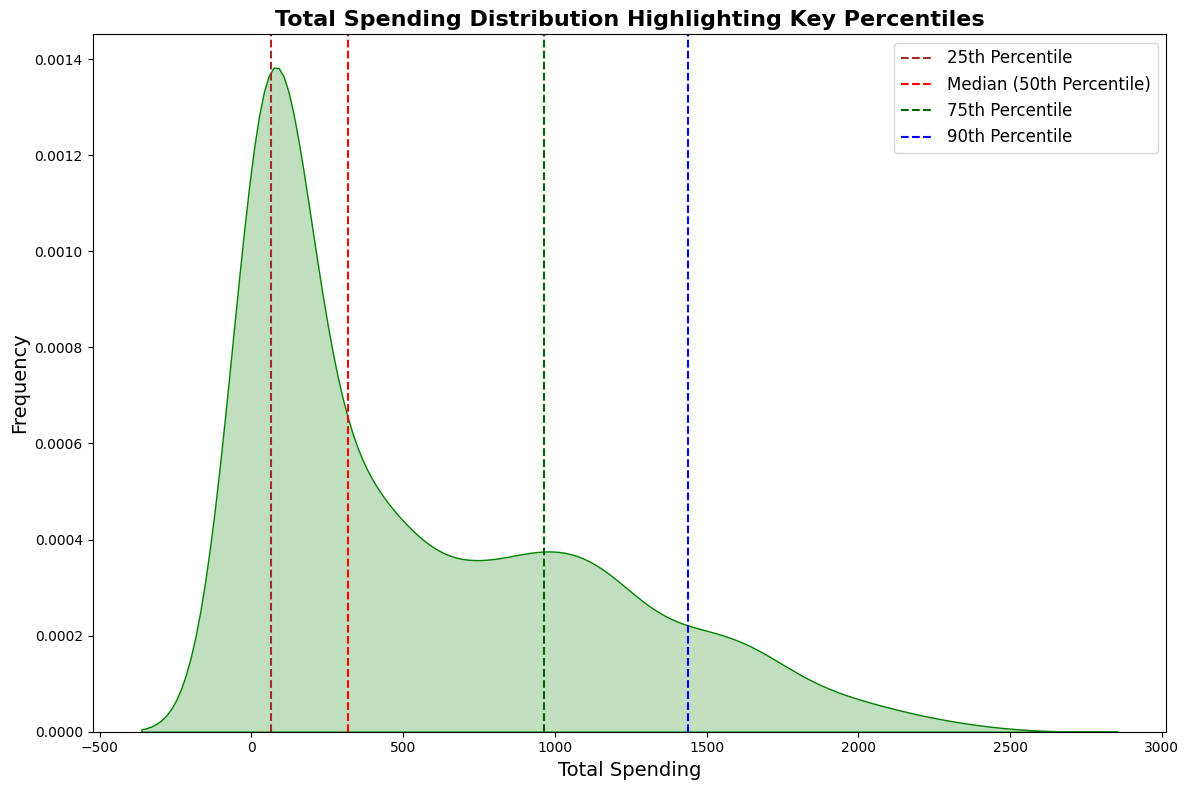

      TotalSpending
0.25           65.0
0.50          319.5
0.75          962.5
0.90         1438.0
0.95         1675.9


In [39]:
# Calculate specific percentiles for Total Spending
total_spending_percentiles = df['TotalSpending'].quantile([0.25, 0.5, 0.75, 0.9, 0.95]).to_frame()

# Visualize the Total Spending distribution, emphasizing critical ranges
plt.figure(figsize=(12, 8))  # Slightly larger for better readability
sns.kdeplot(df['TotalSpending'],  color='green',fill=True)  # Softer color with transparency
plt.title('Total Spending Distribution Highlighting Key Percentiles', fontsize=16, fontweight='bold')
plt.axvline(df['TotalSpending'].quantile(0.25), color='brown', linestyle='--', label='25th Percentile')
plt.axvline(df['TotalSpending'].quantile(0.5), color='red', linestyle='--', label='Median (50th Percentile)')
plt.axvline(df['TotalSpending'].quantile(0.75), color='darkgreen', linestyle='--', label='75th Percentile')
plt.axvline(df['TotalSpending'].quantile(0.9), color='blue', linestyle='--', label='90th Percentile')

plt.xlabel('Total Spending', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Display the calculated percentiles in a more readable format
print(total_spending_percentiles)

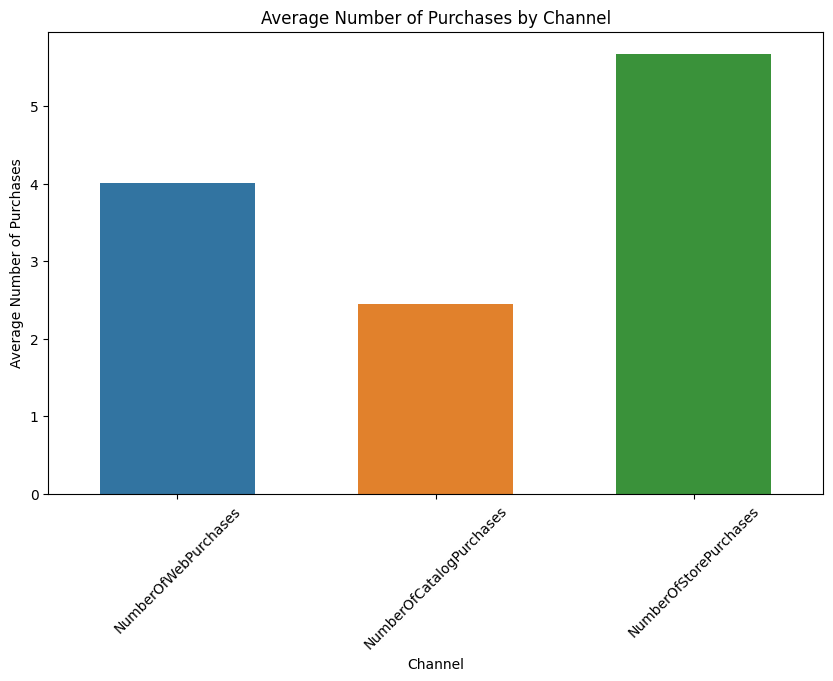

count    2102.000000
mean       14.496194
std         7.587392
min         0.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        39.000000
Name: TotalNumberOfPurchases, dtype: float64

In [40]:
#Analyze Purchase Frequency
purchase_frequency_stats = df['TotalNumberOfPurchases'].describe()

#Channel Preferences - Calculating and visualizing channel usage
channel_preferences = df[['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].mean()

# Visualizing channel preferences
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_preferences.index, y=channel_preferences.values,width=0.6)
plt.title('Average Number of Purchases by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=45)
plt.show()

purchase_frequency_stats

In [41]:
df['NumberOfWebVisitsPerMonth'].describe()

count    2102.000000
mean        5.482398
std         2.362129
min         0.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumberOfWebVisitsPerMonth, dtype: float64

In [42]:
df['NumberOfDealsPurchases'].describe()

count    2102.000000
mean        2.370124
std         1.885848
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumberOfDealsPurchases, dtype: float64

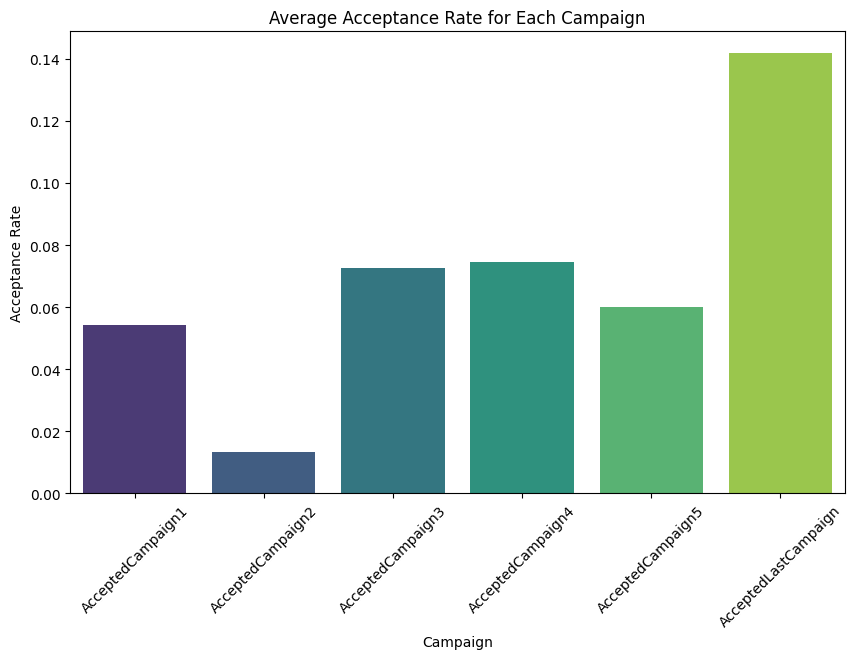

In [43]:
#complete visualization for the accepted campaigns
# Calculate the average acceptance rate for each campaign
campaign_acceptance_rates = df[['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                                 'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign']].mean()

# Visualize the acceptance rates for each campaign
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette='viridis')
plt.title('Average Acceptance Rate for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()


# Bivariant/multivariant Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


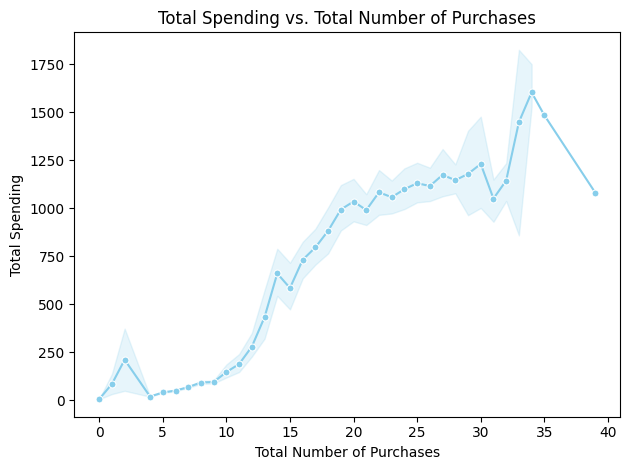

,TotalNumberOfPurchases,TotalSpending
TotalNumberOfPurchases,1.000000,0.770518
TotalSpending,0.770518,1.000000


In [44]:

sns.lineplot(x='TotalNumberOfPurchases', y='TotalSpending', data=df, marker='o', markersize=5, color='skyblue')
plt.title('Total Spending vs. Total Number of Purchases')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()
#type the correlation between the total number of purchases and the total spending  
df[['TotalNumberOfPurchases', 'TotalSpending']].corr()


* In order to move one with the analysis we want to look for the most important features that will be keys for clustring  
* As we saw there is a high correlation between the total number of purchases and the total spending  
* indicating that our submission of the spending of different product categories and using this as the spending of the customer  
* for this company is a valid hypothesis
* to make the multivariant analysis relevant and focused we will compare the features with key features like total spending

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


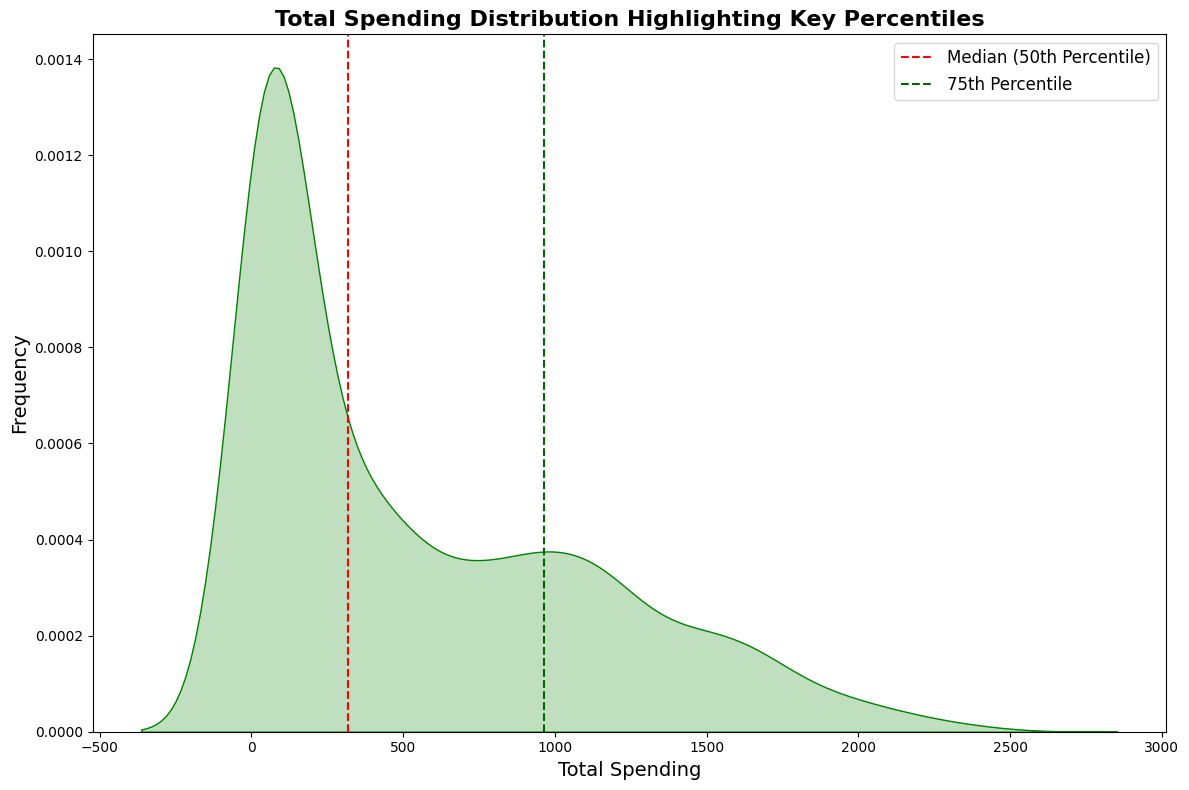

      TotalSpending
0.25           65.0
0.50          319.5
0.75          962.5
0.90         1438.0
0.95         1675.9


In [45]:
#we could assume that total spending is the main feature that will be used to clustre the customers

# Visualize the Total Spending distribution, while segmenting the customers into 3 segments
plt.figure(figsize=(12, 8))  # Slightly larger for better readability
sns.kdeplot(df['TotalSpending'],  color='green',fill=True)  # Softer color with transparency
plt.title('Total Spending Distribution Highlighting Key Percentiles', fontsize=16, fontweight='bold')
plt.axvline(df['TotalSpending'].quantile(0.5), color='red', linestyle='--', label='Median (50th Percentile)')
plt.axvline(df['TotalSpending'].quantile(0.75), color='darkgreen', linestyle='--', label='75th Percentile')

plt.xlabel('Total Spending', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Display the calculated percentiles in a more readable format
print(total_spending_percentiles)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


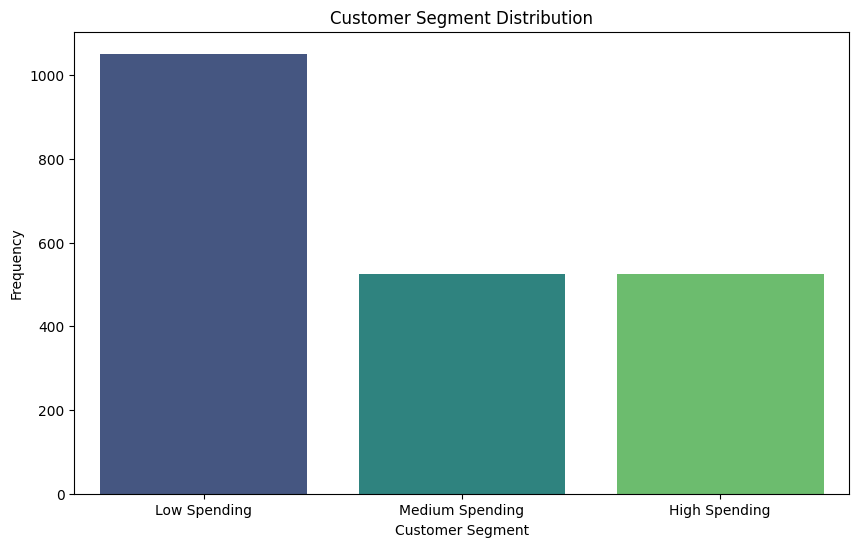

In [46]:
#we could now say that there is three major segments of customers depenfing on thr spending the average low spending customers, the medium and the high spending 
#low spending customers are the ones that have a total spending less than the 50th percentile
#medium spending customers are the ones that have a total spending less than the 75th percentile and more than the 50th percentile
#high spending customers are the ones that have a total spending more than the 75th percentile

#create a new column for the segment of the customer
df['CustomerSegment'] = pd.cut(df['TotalSpending'], bins=[0, df['TotalSpending'].quantile(0.5), df['TotalSpending'].quantile(0.75), df['TotalSpending'].max()], labels=['Low Spending', 'Medium Spending', 'High Spending'])

# Visualize the distribution of the customer segments
plt.figure(figsize=(10, 6))
sns.countplot(x='CustomerSegment', data=df, palette='viridis')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Frequency')
plt.show()


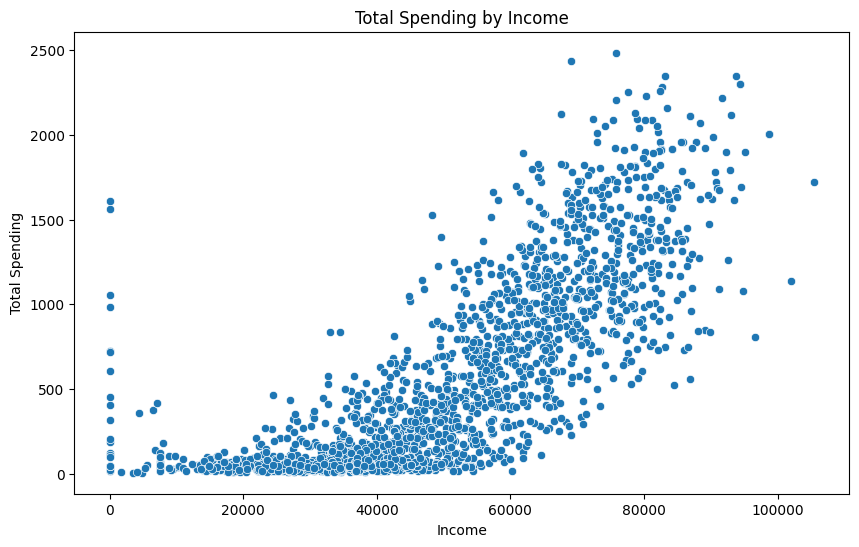

,Income,TotalSpending
Income,1.000000,0.796117
TotalSpending,0.796117,1.000000


In [47]:
#scatter plot between income and total spending
#while coloring the different segments of the customer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=df)
plt.title('Total Spending by Income')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()
#correlation between income and total spending
df[['Income', 'TotalSpending']].corr()



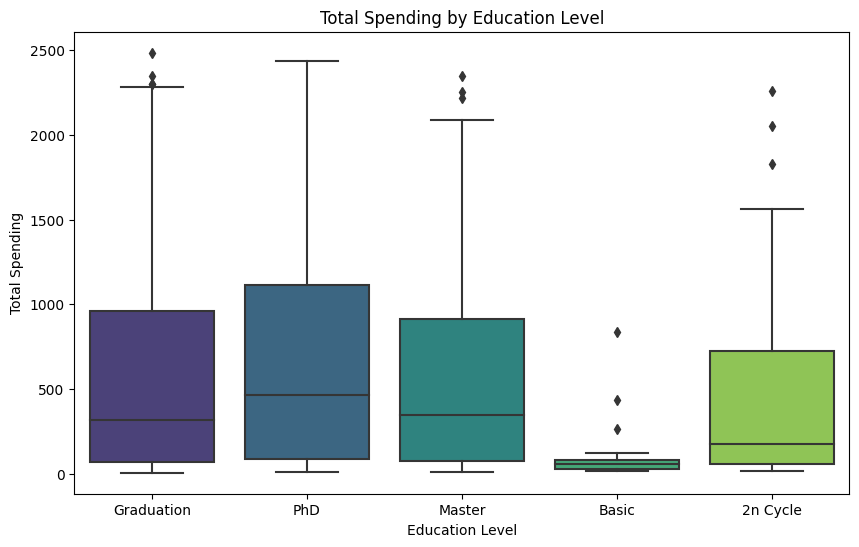

In [48]:
#analyse the relationship between education, and the total spending using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='TotalSpending', data=df, palette='viridis')
plt.title('Total Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.show()


In [49]:
#let's group basic education together
df['Education'] = df['Education'].replace(['Basic', '2n Cycle'], 'Basic Education')

#print the count of lower education vs higher education

df['Education'].value_counts()


Education
Graduation         1039
PhD                 468
Master              358
Basic Education     237
Name: count, dtype: Int64

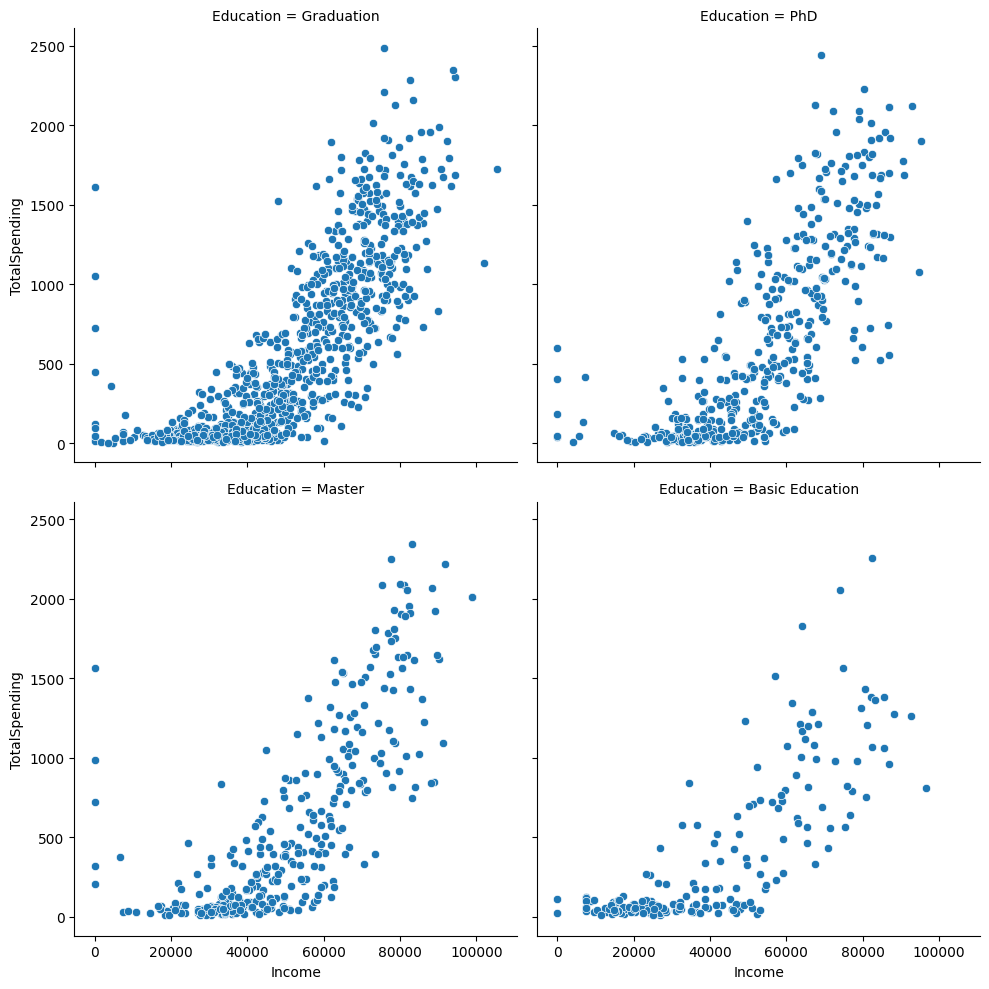

In [50]:
sns.relplot(x='Income', y='TotalSpending', data=df, col='Education',kind='scatter', col_wrap=2)
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()


There is no clear pattern about the education and the spending of the customer

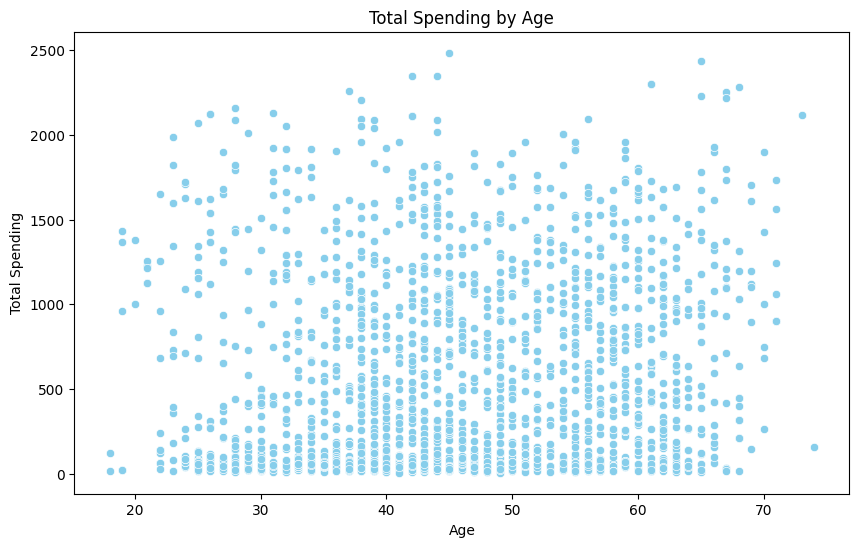

In [51]:
#scatter plot between age and the spending of the customer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalSpending', data=df, color='skyblue')
plt.title('Total Spending by Age')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.show()


Age doesn't seem to have a strong correlation with Total Spending


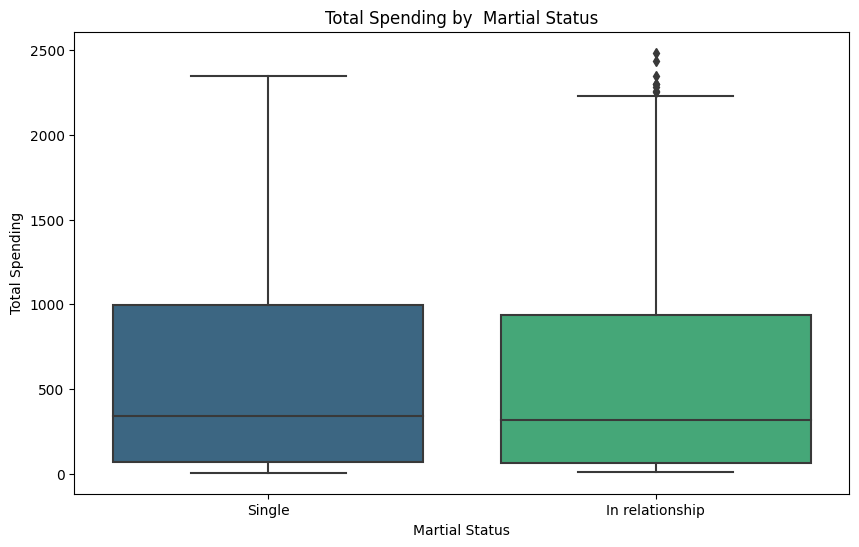

In [52]:
##analyse the relationship between Martial status, and the total spending using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='TotalSpending', data=df, palette='viridis')
plt.title('Total Spending by  Martial Status')
plt.xlabel('Martial Status')
plt.ylabel('Total Spending')
plt.show()
#there is no relationship between the marital status and the total spending of the customer

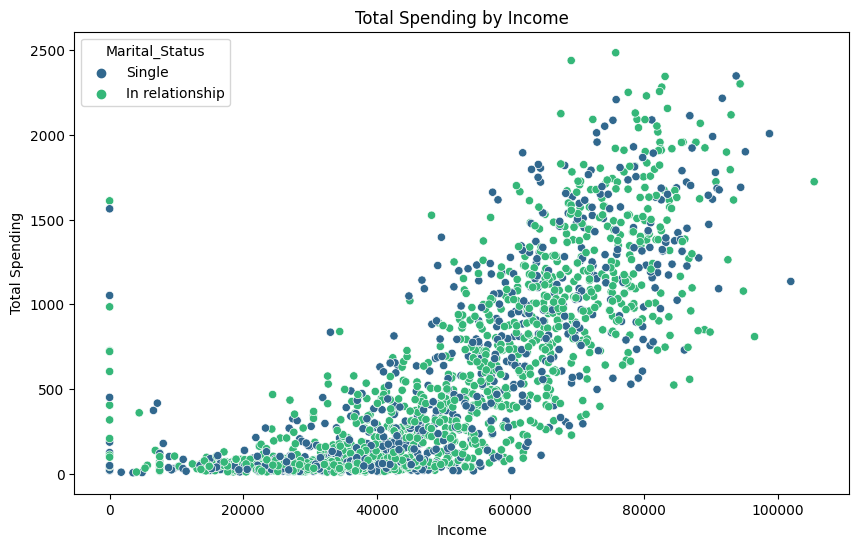

In [53]:
#scatter plot between income and total spending
#while coloring the different segments of the customer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=df, hue='Marital_Status', palette='viridis')
plt.title('Total Spending by Income')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()


In [54]:
df['Marital_Status'].value_counts()

Marital_Status
In relationship    1356
Single              746
Name: count, dtype: Int64

there is a high variablity in terms of marital and the spending no specific pattern

In [55]:
#describe number of kids at home and number of teens at home
df[['NumberOfKidsAtHome', 'NumberOfTeensAtHome','TotalNumberOfChildren','TotalSpending']].describe()


,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,TotalSpending
count,2102.000000,2102.000000,2102.000000,2102.000000
mean,0.468601,0.525214,0.993815,551.869648
std,0.542978,0.546794,0.745259,566.170429
min,0.000000,0.000000,0.000000,5.000000
25%,0.000000,0.000000,0.000000,65.000000
50%,0.000000,1.000000,1.000000,319.500000
75%,1.000000,1.000000,1.000000,962.500000
max,2.000000,2.000000,3.000000,2486.000000


In [56]:
grouped_data = df.groupby(['NumberOfKidsAtHome', 'NumberOfTeensAtHome']).size().reset_index(name='NumberOfCustomers')
grouped_data 

,NumberOfKidsAtHome,NumberOfTeensAtHome,NumberOfCustomers
0,0,0,537
1,0,1,598
2,0,2,30
3,1,0,496
4,1,1,371
5,1,2,22
6,2,0,17
7,2,1,31


/tmp/ipykernel_18/3482113360.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='Income', y='TotalSpending', data=df, col='NumberOfKidsAtHome', row='NumberOfTeensAtHome', palette='viridis')


<Figure size 1000x600 with 0 Axes>

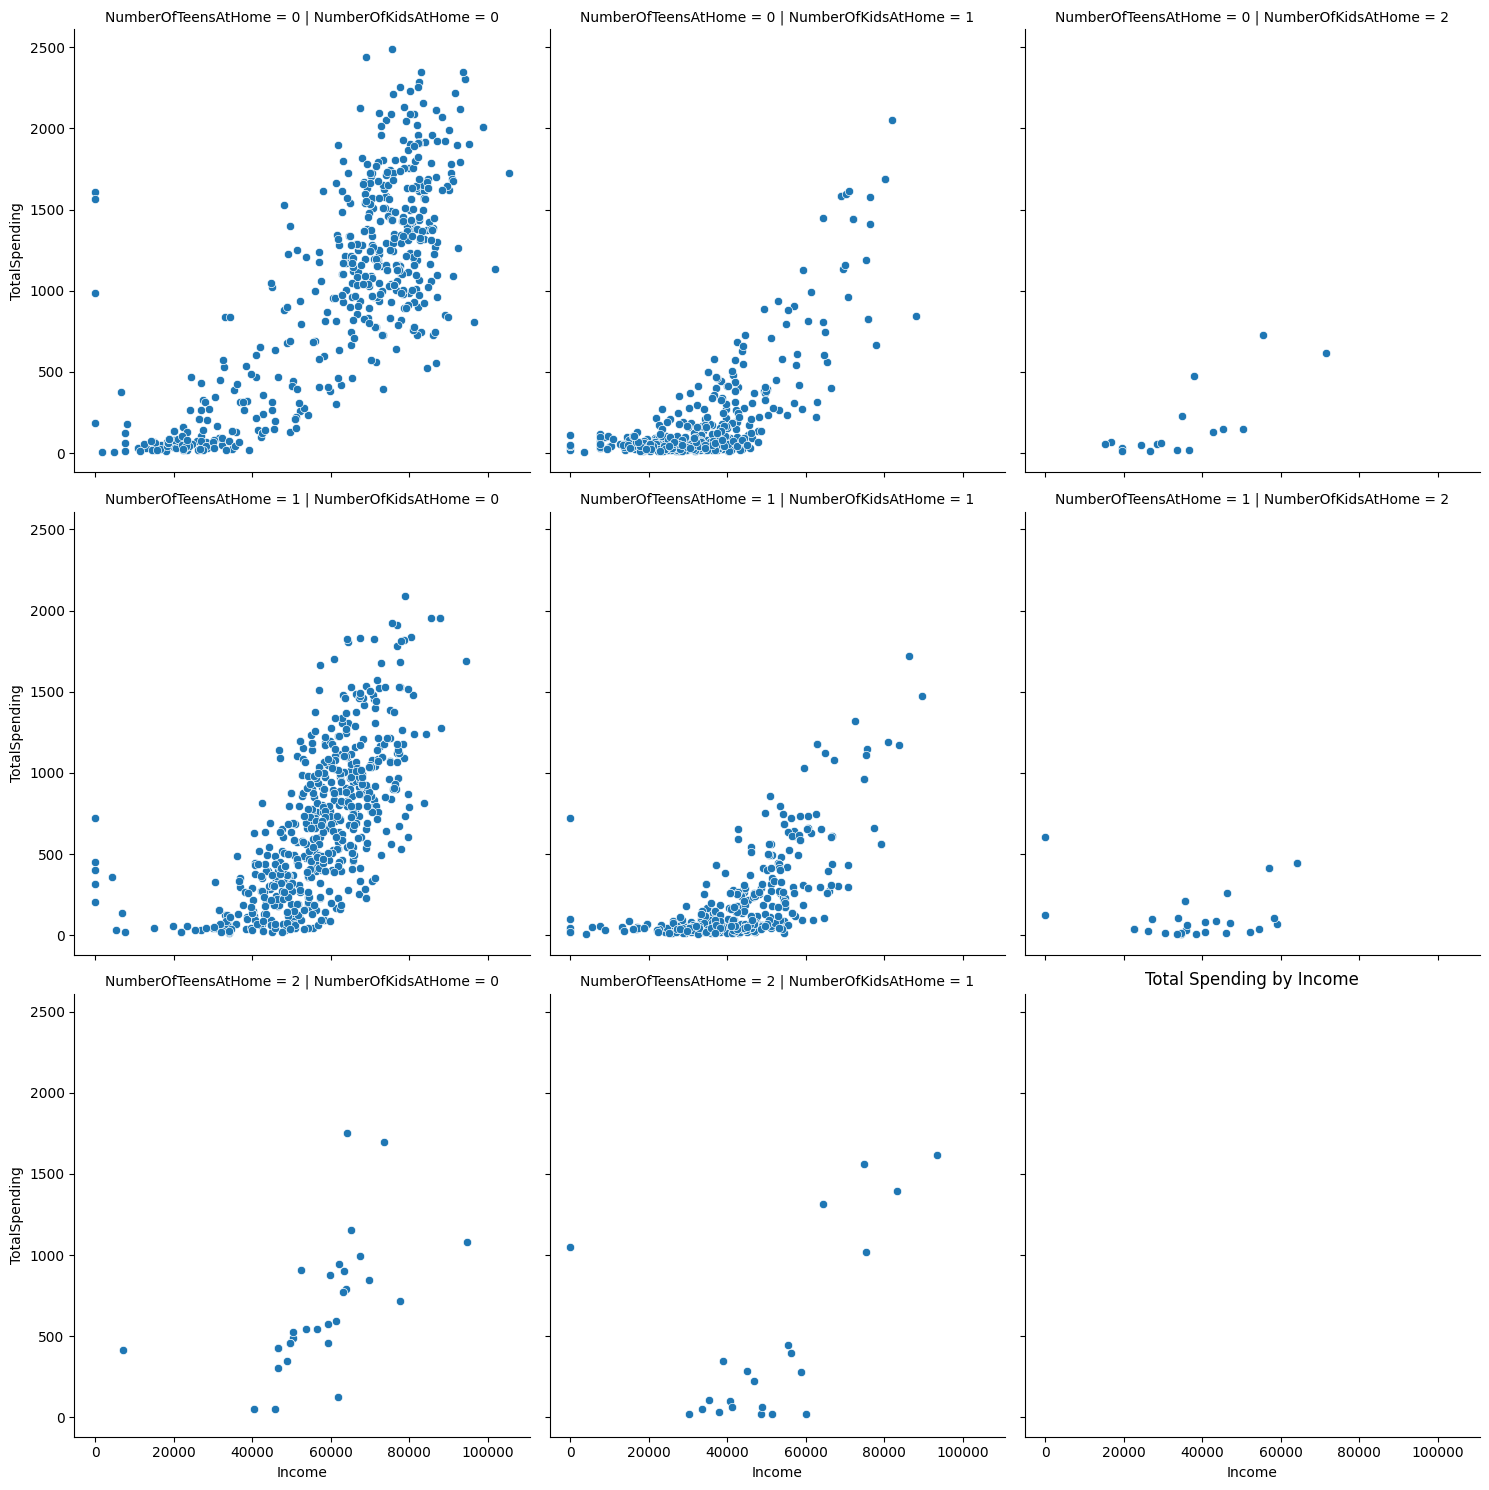

In [57]:
#scatter plot using relplot between income and total spending and the number of kids at home and the number of teens at home
#in rows and columns
plt.figure(figsize=(10, 6))
sns.relplot(x='Income', y='TotalSpending', data=df, col='NumberOfKidsAtHome', row='NumberOfTeensAtHome', palette='viridis')
plt.title('Total Spending by Income')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()





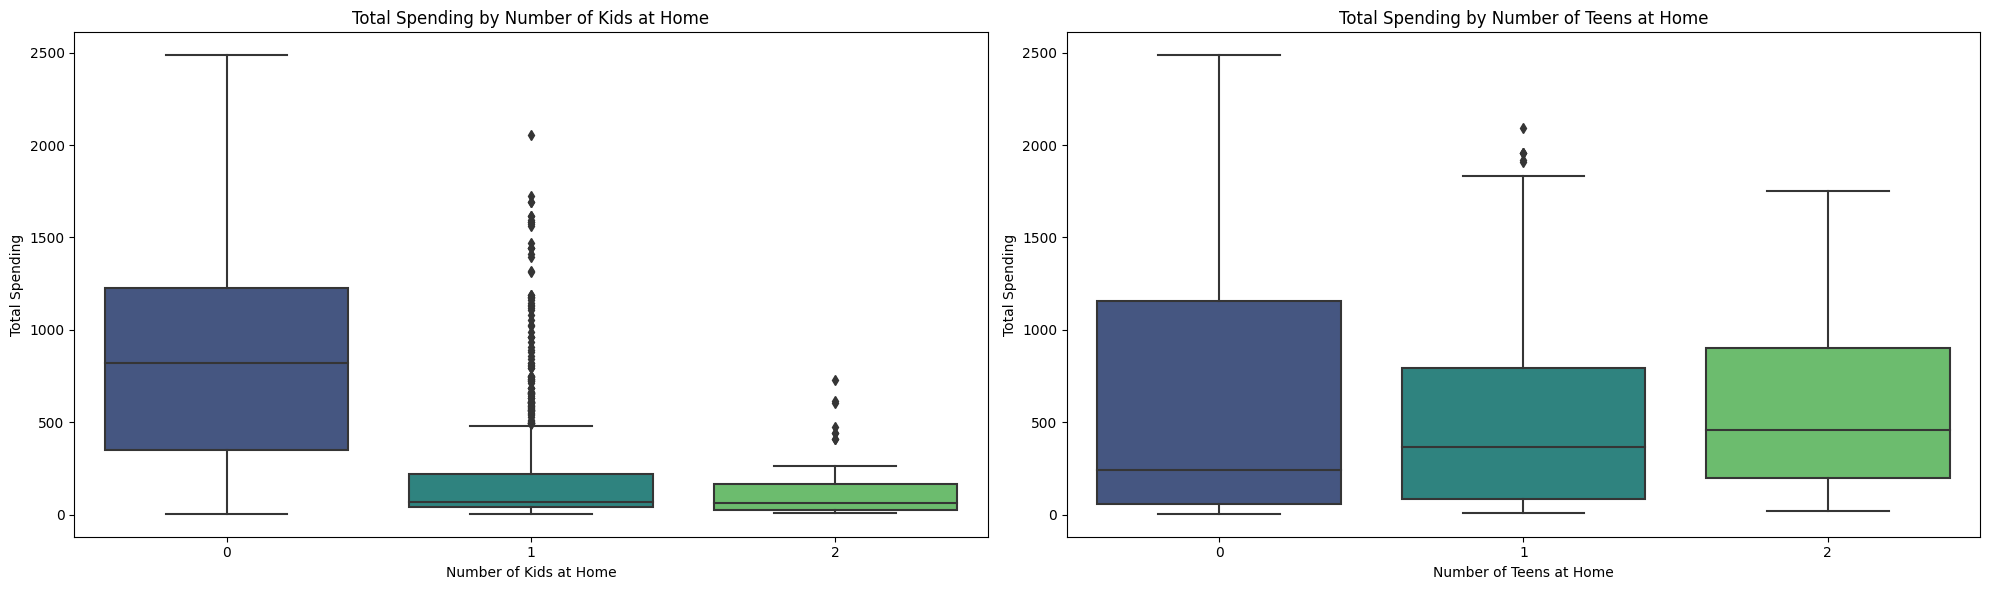

NumberOfKidsAtHome    -0.604935
NumberOfTeensAtHome   -0.002367
TotalSpending          1.000000
Name: TotalSpending, dtype: float64

In [58]:
#create box plot for the number of kids at home and the total spending and beside it the number of teens at home and the total spending
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for number of kids at home
sns.boxplot(x='NumberOfKidsAtHome', y='TotalSpending', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Total Spending by Number of Kids at Home')
axes[0].set_xlabel('Number of Kids at Home')
axes[0].set_ylabel('Total Spending')

# Plot for number of teens at home
sns.boxplot(x='NumberOfTeensAtHome', y='TotalSpending', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Total Spending by Number of Teens at Home')
axes[1].set_xlabel('Number of Teens at Home')
axes[1].set_ylabel('Total Spending')

plt.tight_layout()
plt.show()

#correlation between the number of kids at home and the total spending using the spearman method
df[['NumberOfKidsAtHome','NumberOfTeensAtHome', 'TotalSpending']].corr(method='spearman')['TotalSpending']



There is some pattern here people with teens have more potential to spend more

/tmp/ipykernel_18/3113491359.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  spending_pivot = df.pivot_table(index='CustomerSegment', values=spending_cols, aggfunc='mean')


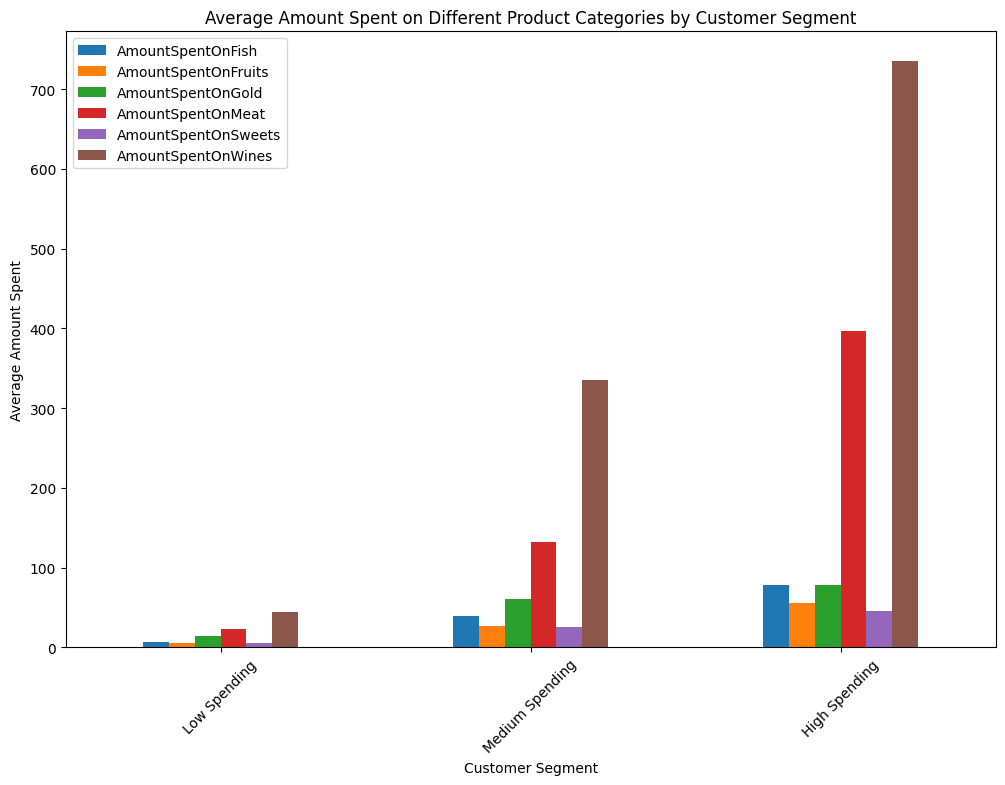

In [59]:
#analysis for the amount spent on different product categories and total spending, are more spending in general 
# Create a pivot table
spending_pivot = df.pivot_table(index='CustomerSegment', values=spending_cols, aggfunc='mean')

# Visualize the pivot table
spending_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Average Amount Spent on Different Product Categories by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.show()



the Meat and wine are overall the highest in spending from what we seen early in the analysis, and it is the most   
contributer to the total spending of the customer  
the other categories didn't got increase in spending but that might be due to the nature of the products themselves

In [60]:
df[['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].describe()

,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases
count,2102.000000,2102.000000,2102.000000
mean,4.003330,2.444814,5.677926
std,2.697768,2.661365,3.203324
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,3.000000,1.000000,5.000000
75%,6.000000,4.000000,8.000000
max,25.000000,11.000000,13.000000


In [61]:
#does the medium of customer purchases effect the total number of purchases
# Create a pivot table
channel_pivot = df.pivot_table(index='CustomerSegment', values=['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases'], aggfunc='mean')

channel_pivot

/tmp/ipykernel_18/1582349535.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  channel_pivot = df.pivot_table(index='CustomerSegment', values=['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases'], aggfunc='mean')


,NumberOfCatalogPurchases,NumberOfStorePurchases,NumberOfWebPurchases
CustomerSegment,,,
Low Spending,0.550904,3.259753,2.128449
Medium Spending,3.062857,7.506667,6.080000
High Spending,5.612167,8.684411,5.676806


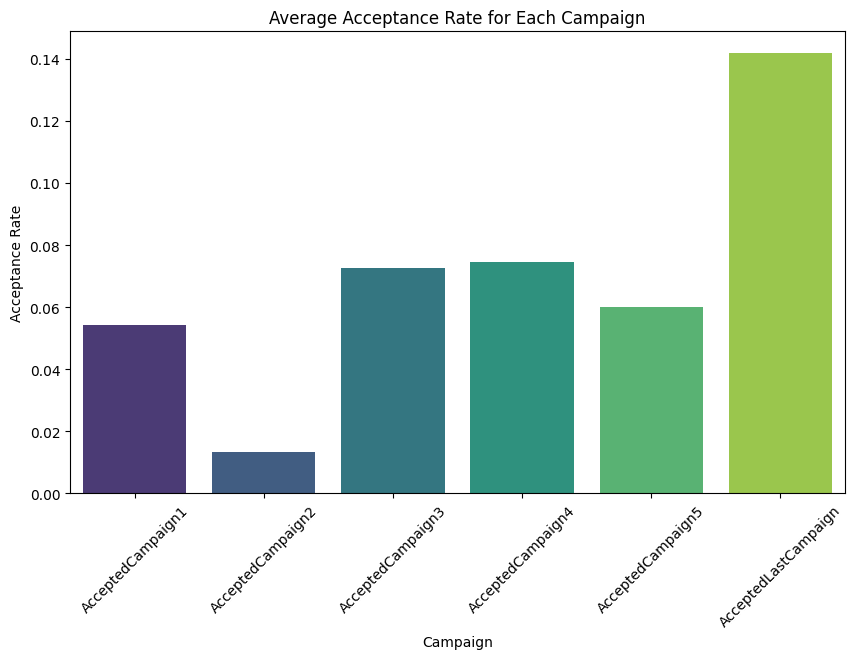

In [62]:

campaign_acceptance_rates = df[['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                                 'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign']].mean()

# Visualize the acceptance rates for each campaign
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette='viridis')
plt.title('Average Acceptance Rate for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()


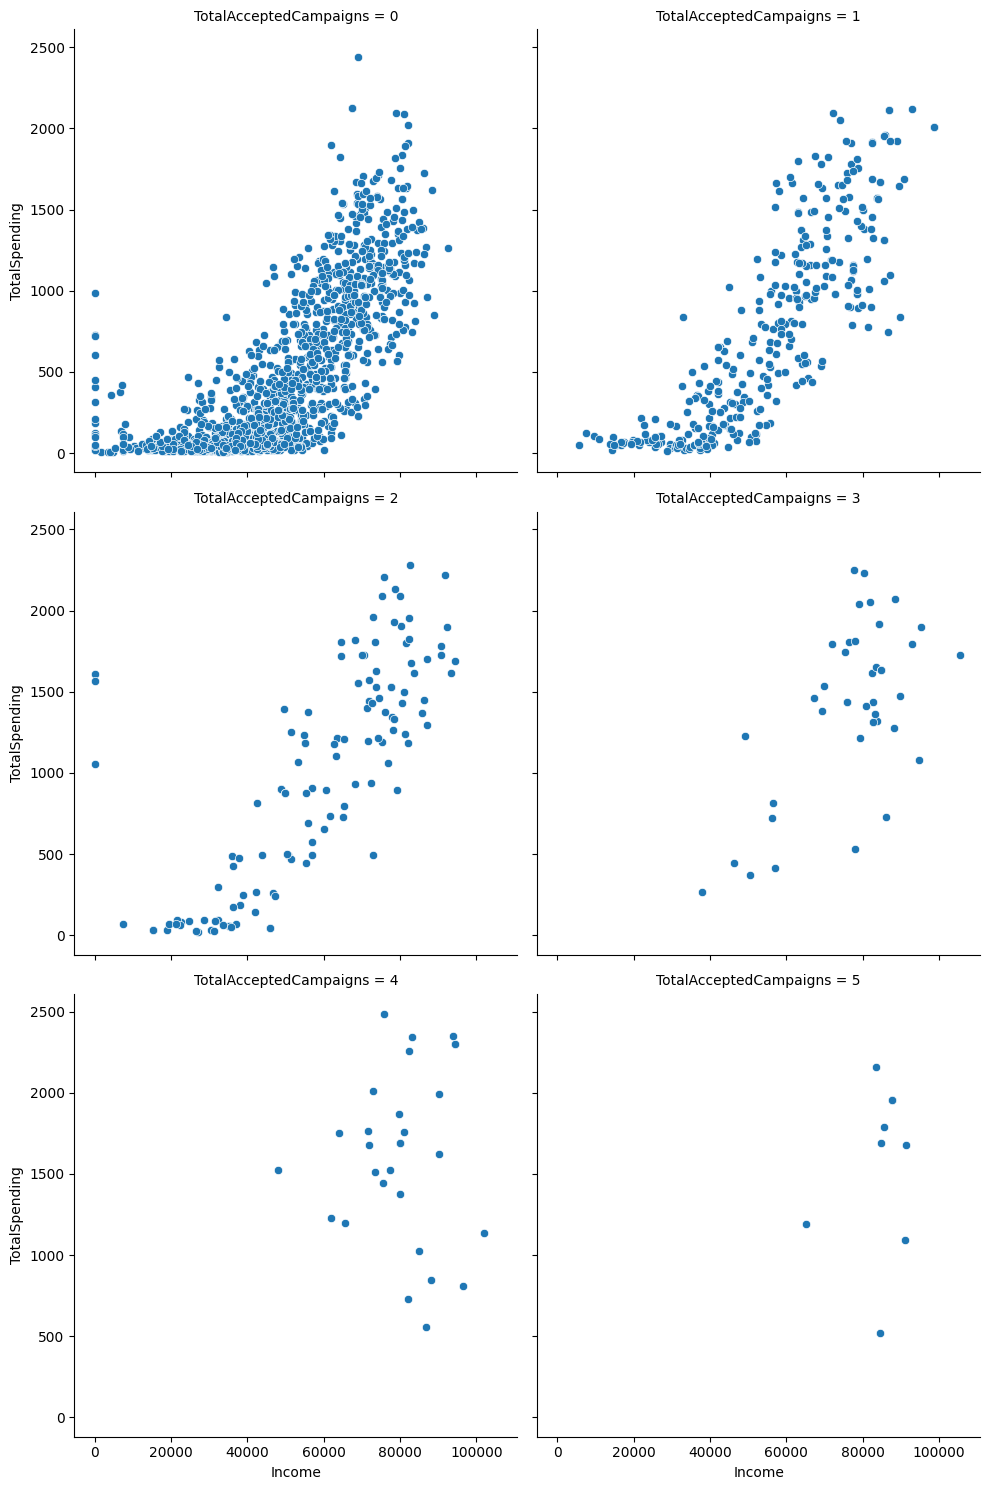

In [63]:
sns.relplot(x='Income', y='TotalSpending', data=df, kind='scatter',col='TotalAcceptedCampaigns',col_wrap=2 )

plt.show()


In [64]:
#compare the total accepted campaigns and the total spending
# Create a pivot table
campaigns_spending_pivot = df.pivot_table(index='CustomerSegment', values=['TotalAcceptedCampaigns'], aggfunc='mean')

campaigns_spending_pivot


/tmp/ipykernel_18/3067548304.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  campaigns_spending_pivot = df.pivot_table(index='CustomerSegment', values=['TotalAcceptedCampaigns'], aggfunc='mean')


,TotalAcceptedCampaigns
CustomerSegment,
Low Spending,0.174120
Medium Spending,0.365714
High Spending,0.952471


In [65]:
df[['TotalAcceptedCampaigns'] ].value_counts()

TotalAcceptedCampaigns
0                         1560
1                          335
2                          127
3                           42
4                           29
5                            9
Name: count, dtype: int64

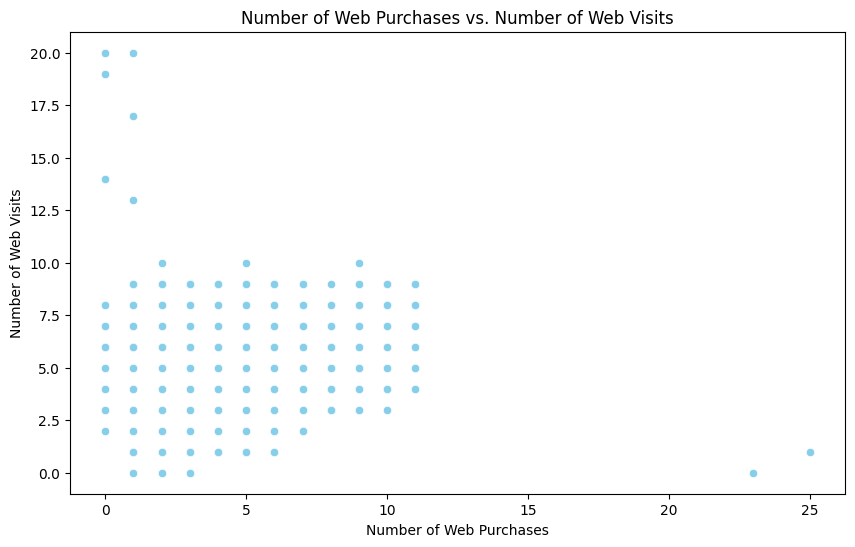

,NumberOfWebPurchases,NumberOfWebVisitsPerMonth
NumberOfWebPurchases,1.000000,-0.096898
NumberOfWebVisitsPerMonth,-0.096898,1.000000


In [66]:
#visualize the scatter plot between web purchases and web visits
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumberOfWebPurchases', y='NumberOfWebVisitsPerMonth', data=df, color='skyblue')
plt.title('Number of Web Purchases vs. Number of Web Visits')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Number of Web Visits')
plt.show()
#correration between the number of web purchases and the number of web visits
df[['NumberOfWebPurchases', 'NumberOfWebVisitsPerMonth']].corr(method='spearman')



# Clustring


## Importing necessary libraries

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer



## Preprocessing

In [68]:
# Define categorical and numerical columns based on what features are most important from our analysis
categorical_cols = ['Education','Marital_Status']

numerical_cols=['Income', 'NumberOfKidsAtHome', 'NumberOfTeensAtHome', 
                'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 'AmountSpentOnFish',
                'AmountSpentOnSweets', 'AmountSpentOnGold', 'NumberOfDealsPurchases',
                'NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases', 
                'NumberOfWebVisitsPerMonth'
                , 'AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 'AcceptedCampaign4', 'AcceptedCampaign5',
                'AcceptedLastCampaign']

# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps into a single ColumnTransformer pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
 ])

# Apply the ColumnTransformer to our data
data_prepared = preprocessor.fit_transform(df)

# The result is a NumPy array. Let's convert it to a DataFrame for better readability
# Get feature names from onehot encoder
onehot_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()

all_features = numerical_cols + onehot_features.tolist()
onehot_features.tolist()

# Create a DataFrame with the transformed features
data_prepared_df = pd.DataFrame(data_prepared, columns=all_features)

data_prepared_df.head()

,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,x0_Basic Education,x0_Graduation,x0_Master,x0_PhD,x1_In relationship,x1_Single
0,0.418849,-0.863226,-0.960763,1.034543,1.779988,2.108660,2.781326,2.346264,0.922482,0.334081,1.481825,2.839514,-0.523932,0.642625,-0.239466,-0.116192,-0.280182,-0.284112,-0.252518,2.460425,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.155132,0.978907,0.868516,-0.835687,-0.611068,-0.721470,-0.622451,-0.671429,-0.711466,-0.196311,-1.113530,-0.543014,-1.148432,-0.204270,-0.239466,-0.116192,-0.280182,-0.284112,-0.252518,-0.406434,0.0,1.0,0.0,0.0,0.0,1.0
2,1.074640,-0.863226,-0.960763,0.408136,0.708136,-0.087311,1.559971,0.022294,0.005877,-0.726702,1.481825,-0.167177,1.349568,-0.627718,-0.239466,-0.116192,-0.280182,-0.284112,-0.252518,-0.406434,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.113778,0.978907,-0.960763,-0.835687,-0.528617,-0.648096,-0.462273,-0.602057,-0.731392,-0.196311,-0.742765,-0.918850,-0.523932,0.219177,-0.239466,-0.116192,-0.280182,-0.284112,-0.252518,-0.406434,0.0,1.0,0.0,0.0,1.0,0.0
4,0.426393,0.978907,-0.960763,-0.350146,0.543235,-0.134480,0.258527,0.230410,-0.532130,1.394864,0.369530,0.208659,0.100568,-0.204270,-0.239466,-0.116192,-0.280182,-0.284112,-0.252518,-0.406434,0.0,0.0,0.0,1.0,1.0,0.0


## Applying the Elbow Method 

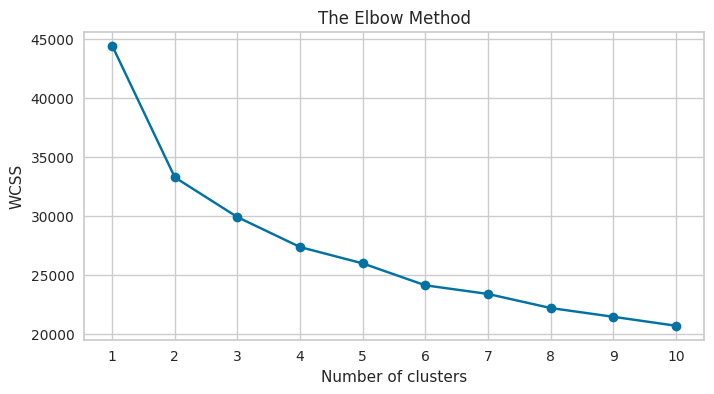

In [69]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=42)
    kmeans.fit(data_prepared_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()  


## Applying k-means

In [70]:
# K-Means for 3 clusters
kmeans_4 = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
clusters_4 = kmeans_4.fit_predict(data_prepared_df)

# Add the cluster labels to your dataframe
df['Cluster_4'] = clusters_4


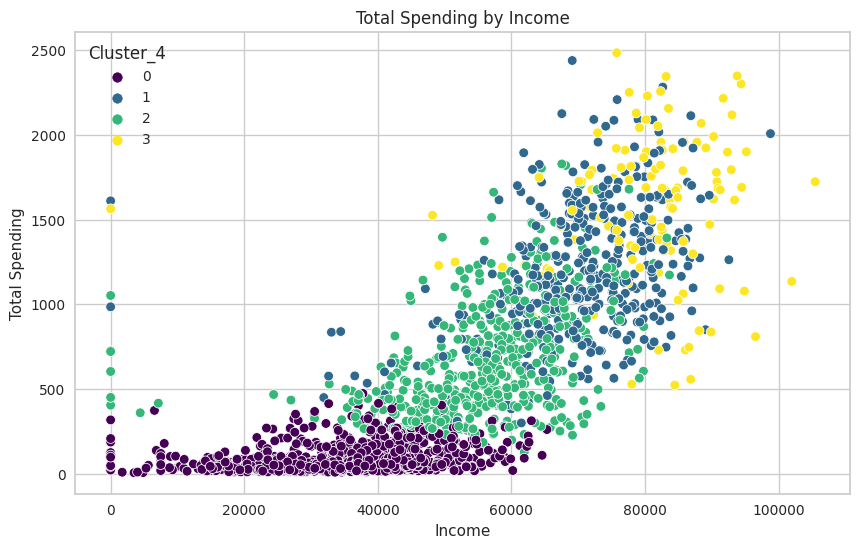

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=df, hue='Cluster_4', palette='viridis')
plt.title('Total Spending by Income')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()


In [72]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
cluster_analysis_4 = df.groupby('Cluster_4')[numeric_cols].mean()
cluster_analysis_4

,Age,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,Cluster_4
Cluster_4,,,,,,,,,,,,,,,,,,,,,,,,,,
0,42.327309,33193.478916,0.804217,0.433735,1.237952,37.454819,4.721888,21.697791,6.941767,4.820281,14.696787,90.333333,2.009036,2.046185,0.503012,3.153614,7.711847,6.529116,0.000000,0.002008,0.073293,0.006024,0.000000,0.090361,0.171687,0.0
1,46.584726,70139.393795,0.054893,0.312649,0.367542,505.591885,67.952267,384.720764,98.835322,55.274463,76.916468,1189.291169,1.627685,5.355609,5.479714,8.663484,21.126492,3.195704,0.095465,0.000000,0.057279,0.023866,0.000000,0.150358,0.326969,1.0
2,49.135135,56024.457658,0.275676,0.935135,1.210811,430.751351,16.646847,116.149550,22.172973,15.596396,55.279279,656.596396,3.873874,6.144144,2.814414,7.333333,20.165766,5.870270,0.034234,0.010811,0.068468,0.145946,0.001802,0.120721,0.381982,2.0
3,45.659091,80096.530303,0.060606,0.166667,0.227273,916.659091,48.666667,414.393939,67.568182,46.772727,76.651515,1570.712121,1.128788,5.477273,5.909091,8.287879,20.803030,3.212121,0.416667,0.151515,0.136364,0.454545,0.946970,0.590909,2.696970,3.0


In [73]:
df.drop(columns=['CustomerSegment'], inplace=True)

In [74]:
# Select only numeric columns for aggregation
numeric_cols = df.select_dtypes(include=['number']).columns

# Generate summary statistics for numerical features for each cluster
cluster_summary_numerical = df.groupby('Cluster_4')[numeric_cols].agg(['mean', 'std', 'min', 'max'])

# Count the distribution of categorical features for each cluster
education_distribution = df.groupby(['Cluster_4', 'Education']).size().unstack(fill_value=0)
marital_status_distribution = df.groupby(['Cluster_4', 'Marital_Status']).size().unstack(fill_value=0)



In [75]:
cluster_summary_numerical


Age                           Income                    \
                mean        std min max          mean           std min   
Cluster_4                                                                 
0          42.327309  11.018272  18  74  33193.478916  12177.959581   0   
1          46.584726  12.520963  19  71  70139.393795  11733.561120   0   
2          49.135135  10.076859  22  71  56024.457658  11525.432560   0   
3          45.659091  14.193230  19  73  80096.530303  11806.412462   0   

                  NumberOfKidsAtHome                   NumberOfTeensAtHome  \
              max               mean       std min max                mean   
Cluster_4                                                                    
0           65316           0.804217  0.489921   0   2            0.433735   
1           98777           0.054893  0.238303   0   2            0.312649   
2           83664           0.275676  0.470850   0   2            0.935135   
3          105471           0.060606  0.239515   0   1            0.166667   

                            TotalNumberOfChildren                    \
                std min max                  mean       std min max   
Cluster_4                                                             
0          0.519593   0   2              1.237952  0.705047   0   3   
1          0.479341   0   2              0.367542  0.516240   0   2   
2          0.428381   0   2              1.210811  0.598336   0   3   
3          0.430988   0   2              0.227273  0.518231   0   3   

          AmountSpentOnWines                        AmountSpentOnFruits  \
                        mean         std  min   max                mean   
Cluster_4                                                                 
0                  37.454819   46.020478    0   308            4.721888   
1                 505.591885  270.431673   33  1396           67.952267   
2                 430.751351  270.346988    7  1349           16.646847   
3                 916.659091  338.380626  152  1493           48.666667   

                              AmountSpentOnMeat                       \
                 std min  max              mean         std min  max   
Cluster_4                                                              
0           7.180793   0   55         21.697791   22.838081   0  141   
1          47.570724   0  199        384.720764  196.236189  64  873   
2          19.968151   0  142        116.149550   82.728958   6  650   
3          45.906088   0  185        414.393939  228.834110  48  853   

          AmountSpentOnFish                     AmountSpentOnSweets  \
                       mean        std min  max                mean   
Cluster_4                                                             
0                  6.941767  11.507857   0  150            4.820281   
1                 98.835322  63.005347   0  258           55.274463   
2                 22.172973  24.728467   0  149           15.596396   
3                 67.568182  55.141898   0  216           46.772727   

                              AmountSpentOnGold                      \
                 std min  max              mean        std min  max   
Cluster_4                                                             
0           6.958804   0   78         14.696787  18.366849   0  262   
1          34.158491   0  129         76.916468  59.156594   0  248   
2          18.794710   0  114         55.279279  51.163850   0  321   
3          34.898236   0  129         76.651515  63.955732   0  245   

          TotalSpending                        NumberOfDealsPurchases  \
                   mean         std  min   max                   mean   
Cluster_4                                                               
0             90.333333   80.037123    5   473               2.009036   
1           1189.291169  381.839505  299  2440               1.627685   
2            656.596396  326.064404  126  1829        

In [76]:
education_distribution 

Education,Basic Education,Graduation,Master,PhD
Cluster_4,,,,
0,162,488,161,185
1,40,237,59,83
2,28,252,113,162
3,7,62,25,38


In [77]:
marital_status_distribution

Marital_Status,In relationship,Single
Cluster_4,,
0,639,357
1,257,162
2,369,186
3,91,41


# Customer Clusters Profiling


#### Cluster 0: Budget-Conscious 
- **Income & Demographics**: Lower average income with significant variability; predominantly basic education and graduation levels; a mix of singles and those in relationships.
- **Family Structure**: Higher likelihood of having kids at home.
- **Engagement**: Lower engagement with marketing campaigns.
- **Purchasing Preferences**: Preference for value and discounts, reflected in their purchasing behavior.

#### Cluster 1: Career-Oriented Individuals
- **Income & Demographics**: Higher average income; high levels of graduation and master's degrees; more often in a relationship.
- **Family Structure**: Fewer kids at home, focusing on career or personal life.
- **Engagement**: Moderate engagement with campaigns, especially through catalog and web purchases.
- **Purchasing Preferences**: Frequent catalog and web purchases, valuing convenience and quality.

#### Cluster 2: Discerning Traditionalists
- **Income & Demographics**: Moderately high income with an emphasis on quality. This group includes a significant number of individuals with advanced degrees
- **Family Structure**: Displays a variety of family stages, indicating a diverse set of needs and lifestyles.
- **Engagement**: More responsive to marketing efforts that align with their values of quality
- **Purchasing Preferences**:utilizing both digital and physical channels.


#### Cluster 3: Affluent Enthusiasts with a Taste for Luxury
- **Income & Demographics**: Highest income levels; higher education levels
- **Family Structure**: Minimal kids at home, focusing on luxury and personal indulgence.
- **Engagement**: High engagement with luxury and exclusivity in marketing campaigns.
- **Purchasing Preferences**: Preference for exclusivity, shown by predominant catalog purchases and minimal deals.

